# PROJET 7 : Implémentez un modèle de scoring
*Bertrand COQUARD(Octobre  2023)*

## CONTEXTE DU PROJET

Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.).

De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de transparence vis-à-vis des décisions d’octroi de crédit. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner.

Prêt à dépenser décide donc de développer un dashboard interactif pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.

**Votre mission :**  
- Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.  
- Construire un dashboard interactif à destination des gestionnaires de la relation client permettant d'interpréter les prédictions faites par le modèle, et d’améliorer la connaissance client des chargés de relation client.  
- Mettre en production le modèle de scoring de prédiction à l’aide d’une API, ainsi que le dashboard interactif qui appelle l’API pour les prédictions.

**Spécifications du dashboard :**
- Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
- Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
- Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.

## DONNEES DU PROJET

Voici les données dont vous aurez besoin pour réaliser le dashboard :  
https://www.kaggle.com/c/home-credit-default-risk/data  
Pour plus de simplicité, vous pouvez les télécharger à cette adresse :  
https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip

## IMPORT DES LIBRAIRIES, LOAD DATA

In [1]:
!pip install mlflow
!databricks configure --host https://community.cloud.databricks.com/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
Username: bcoquard@icloud.com
Password: 
Repeat for confirmation: 
Error: The two entered values do not match.
Password: 
Repeat for confirmation: 


In [2]:
import mlflow
mlflow.set_tracking_uri("databricks")
mlflow.set_experiment("/Users/bcoquard@icloud.com/project7")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/5271186378162', creation_time=1694266739331, experiment_id='5271186378162', last_update_time=1695150609919, lifecycle_stage='active', name='/Users/bcoquard@icloud.com/project7', tags={'mlflow.experiment.sourceName': '/Users/bcoquard@icloud.com/project7',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'bcoquard@icloud.com',
 'mlflow.ownerId': '2351504819857202'}>

In [3]:
!pip install evidently

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.21
    Uninstalling SQLAlchemy-2.0.21:
      Successfully uninstalled SQLAlchemy-2.0.21
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
ERROR: pip's dependency resolver d

In [4]:
import os, time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from mlflow.models.signature import infer_signature
import mlflow.sklearn

import gc

from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

import warnings
warnings.filterwarnings('ignore')

## Chargement des fonctions

In [5]:
def shape_df(df):
    print("Le tableau de données possède", df.shape[0],
          "lignes et", df.shape[1], "colonnes.")

def primary_key(df, columns_list):
    if len(df.groupby(columns_list).size().reset_index(name='Freq')) == len(df):
        print("La/les colonne(s) de la liste est/sont une clé primaire du jeu de données.")
    else:
        print("La/Les colonne(s) de la liste n'est/ne sont pas une clé primaire du jeu de données.")

In [6]:
def scores(model_name, model, train, val,
           train_labels, val_labels, results,
           fit_params = {}, threshold = 0.5):

    with mlflow.start_run(run_name = model_name):
        train_start = time.time()
        model.fit(train, train_labels, **fit_params)
        train_time = time.time() - train_start
        predict_start = time.time()
        val_pred_proba = model.predict_proba(val)[:, 1]
        val_pred = (val_pred_proba >= threshold).astype(int)
        predict_time = time.time() - predict_start
        train_pred_proba = model.predict_proba(train)[:, 1]
        train_pred = (train_pred_proba >= threshold).astype(int)

        train_accuracy = accuracy_score(train_labels, train_pred)
        train_precision = precision_score(train_labels, train_pred)
        train_recall = recall_score(train_labels, train_pred)
        train_F1_score = f1_score(train_labels, train_pred)
        train_F2_score = fbeta_score(train_labels, train_pred, beta = 2)
        train_roc_auc = roc_auc_score(train_labels, train_pred_proba)

        val_accuracy = accuracy_score(val_labels, val_pred)
        val_precision = precision_score(val_labels, val_pred)
        val_recall = recall_score(val_labels, val_pred)
        val_F1_score = f1_score(val_labels, val_pred)
        val_F2_score = fbeta_score(val_labels, val_pred, beta = 2)
        val_roc_auc = roc_auc_score(val_labels, val_pred_proba)

        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("val_accuracy", val_accuracy)
        mlflow.log_metric("train_precision", train_precision)
        mlflow.log_metric("val_precision", val_precision)
        mlflow.log_metric("train_recall", train_recall)
        mlflow.log_metric("val_recall", val_recall)
        mlflow.log_metric("train_F1_score", train_F1_score)
        mlflow.log_metric("val_F1_score", val_F1_score)
        mlflow.log_metric("train_F2_score", train_F2_score)
        mlflow.log_metric("val_F2_score", val_F2_score)
        mlflow.log_metric("train_roc_auc", train_roc_auc)
        mlflow.log_metric("val_roc_auc", val_roc_auc)

        signature = infer_signature(train, train_pred)
        mlflow.sklearn.log_model(model, f'{model_name}', signature=signature)

    print('Results on validation set:')
    print(f'Accuracy score:   {val_accuracy : .3}')
    print(f'Precision score:  {val_precision : .3}')
    print(f'Recall score:     {val_recall : .3}')
    print(f'F1 score:         {val_F1_score : .3}')
    print(f'F2 score:         {val_F2_score : .2}')
    print(f'ROCAUC score:     {val_roc_auc : .3}')

    tn, fp, fn, tp = confusion_matrix(val_labels, val_pred).ravel()
    fn_value = 10
    fp_value = 1
    cost = fn*fn_value + fp*fp_value

    results.append([model_name,
                    tn, fp, fn, tp, cost,
                    train_accuracy, val_accuracy,
                    train_precision, val_precision,
                    train_recall, val_recall,
                    train_F1_score, val_F1_score,
                    train_F2_score, val_F2_score,
                    train_roc_auc, val_roc_auc,
                    train_time, predict_time])

    df_results = pd.DataFrame(results, columns=['classifier',
                                                'TN_val', 'FP_val', 'FN_val', 'TP_val',
                                                'cost',
                                                'train_accuracy', 'val_accuracy',
                                                'train_precision', 'val_precision',
                                                'train_recall', 'val_recall',
                                                'train_F1_score', 'val_F1_score',
                                                'train_F2_score', 'val_F2_score',
                                                'train_roc_auc', 'val_roc_auc',
                                                'train_time', 'predict_time'])


    conf_mx = confusion_matrix(val_labels, val_pred)
    fig = plt.figure(figsize=(4, 3))
    sns.heatmap(conf_mx, cmap=plt.cm.gray, annot=True, fmt=".0f",
                xticklabels=['0', '1'], yticklabels=['0', '1'] )
    plt.title("Matrice de confusion\n Validation set (%)",
              fontsize = 10, y = 1.02, fontweight = 'bold')
    plt.xlabel("Classes prédites")
    plt.ylabel("Classes réelles")
    fig.savefig(path+ f'conf_mx_{model_name}.png', dpi=(100), bbox_inches='tight')
    plt.show()

    return df_results


In [7]:


def ROC_curve(model_name, model, val, val_labels, path='/content/gdrive/MyDrive/Project_7/data/'):
    val_pred_proba = model.predict_proba(val)[:, 1]
    fpr, tpr, thresholds = roc_curve(val_labels, val_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Modify the path to include the directory structure
    figure_path = os.path.join(path, 'Représentation_graph')
    os.makedirs(figure_path, exist_ok=True)  # Create the directory if it doesn't exist

    fig = plt.figure(figsize=(4, 3))
    plt.title('Receiver Operating Characteristic',
              fontsize=10, y=1.02, fontweight='bold')
    plt.plot(fpr, tpr, color='red',
             label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    fig.savefig(os.path.join(figure_path, f'ROC_curve_{model_name}.png'),
                bbox_inches="tight", transparent=True)
    plt.show()


In [8]:
#Les focntions ci dessoius ont ete extraites de Kaggle

# Fonction de calcul des aggrégats sur les variables numériques
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.

    Parameters
    --------
        df (dataframe):
            the dataframe to calculate the statistics on
        group_var (string):
            the variable by which to group df
        df_name (string):
            the variable used to rename the columns

    Return
    --------
        agg (dataframe):
            a dataframe with the statistics aggregated for
            all numeric columns. Each instance of the grouping variable will have
            the statistics (mean, min, max, sum; currently supported) calculated.
            The columns are also renamed to keep track of features created.

    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)

    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns

    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]

    return agg

In [9]:
# Fonction de calcul du nombre de modalités par variable catégorielle pour chaque client
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable

    Parameters
    --------
    df : dataframe
        The dataframe to calculate the value counts for.

    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row

    df_name : string
        Variable added to the front of column names to keep track of columns


    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.

    """

    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])

    column_names = []

    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))

    categorical.columns = column_names

    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]

    return categorical

In [10]:
# Fonction  de calcul des aggrégats par client
def aggregate_client(df, group_vars, df_names):
    """Aggregate a dataframe with data at the loan level
    at the client level

    Args:
        df (dataframe): data at the loan level
        group_vars (list of two strings): grouping variables for the loan
        and then the client (example ['SK_ID_PREV', 'SK_ID_CURR'])
        names (list of two strings): names to call the resulting columns
        (example ['cash', 'client'])

    Returns:
        df_client (dataframe): aggregated numeric stats at the client level.
        Each client will have a single row with all the numeric data aggregated
    """

    # Aggregate the numeric columns
    df_agg = agg_numeric(df, group_var = group_vars[0], df_name = df_names[0])

    # If there are categorical variables
    if any(df.dtypes == 'category'):

        # Count the categorical columns
        df_counts = agg_categorical(df, group_var = group_vars[0], df_name = df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var = group_vars[1], df_name = df_names[1])


    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        gc.enable()
        del df_agg
        gc.collect()

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, group_var = group_vars[1], df_name = df_names[1])

    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

In [11]:
# Fonction calculant le taux de manquants des colonnes
# et supprimant les colonnes avec taux > threshlold
def remove_missing_columns(train, test, threshold = 90):
    # Calculate missing stats for train and test (remember to calculate a percent!)
    train_miss = pd.DataFrame(train.isnull().sum())
    train_miss['percent'] = 100 * train_miss[0] / len(train)

    test_miss = pd.DataFrame(test.isnull().sum())
    test_miss['percent'] = 100 * test_miss[0] / len(test)

    # list of missing columns for train and test
    missing_train_columns = list(train_miss.index[train_miss['percent'] > threshold])
    missing_test_columns = list(test_miss.index[test_miss['percent'] > threshold])

    # Combine the two lists together
    missing_columns = list(set(missing_train_columns + missing_test_columns))

    # Print information
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))

    # Drop the missing columns and return
    train = train.drop(columns = missing_columns)
    test = test.drop(columns = missing_columns)

    return train, test

## Chargement des données

In [12]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [13]:
path=('/content/gdrive/MyDrive/Project_7/data/')


In [14]:
# Import des fichiers .csv
path_description = path + 'HomeCredit_columns_description.csv'
path_train = path+ 'application_train.csv'
path_test = path + 'application_test.csv'
description = pd.read_csv(path_description, encoding="cp1252")
app_train = pd.read_csv(path_train)
app_test = pd.read_csv(path_test)

In [15]:
# Visualisation du fichier décrivant les variables de chaque jeu de données
description

Unnamed: 0                         Table                    Row  \
0             1  application_{train|test}.csv             SK_ID_CURR   
1             2  application_{train|test}.csv                 TARGET   
2             5  application_{train|test}.csv     NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv            CODE_GENDER   
4             7  application_{train|test}.csv           FLAG_OWN_CAR   
..          ...                           ...                    ...   
214         217     installments_payments.csv  NUM_INSTALMENT_NUMBER   
215         218     installments_payments.csv        DAYS_INSTALMENT   
216         219     installments_payments.csv     DAYS_ENTRY_PAYMENT   
217         220     installments_payments.csv         AMT_INSTALMENT   
218         221     installments_payments.csv            AMT_PAYMENT   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
214            On which installment we observe payment   
215  When the installment of previous credit was su...   
216  When was the installments of previous credit p...   
217  What was the prescribed installment amount of ...   
218  What the client actually paid on previous cred...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN  

[219 rows x 5 columns]

### Premiere visualisation

In [16]:
# Visualisation des premières lignes de app_train
app_train.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [17]:
app_train.tail(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
307506                         NaN                        NaN   
307507                         NaN                        NaN   
307508                         0.0                        1.0   
307509                         0.0                        0.0   
307510                         0.0                        2.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
307506                        NaN                         NaN  
307507                        NaN                         NaN  
307508                        0.0                         1.0  
307509                        0.0                         0.0  
307510                        0.0                         1.0  

[5 rows x 122 columns]

In [18]:
app_train.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
274948      418679       0         Cash loans           F            Y   
22793       126523       0         Cash loans           F            N   
55020       163752       0         Cash loans           M            Y   
138694      260824       0         Cash loans           F            Y   
138204      260274       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
274948               N             0          202500.0   2013840.0   
22793                Y             0          337500.0    696528.0   
55020                Y             0          202500.0    521280.0   
138694               Y             0          247500.0    568858.5   
138204               N             0          180000.0    248760.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
274948      53253.0  ...                 0                0                0   
22793       55161.0  ...                 0                0                0   
55020       41062.5  ...                 0                0                0   
138694      29911.5  ...                 0                0                0   
138204      25488.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
274948                0                        NaN                       NaN   
22793                 0                        NaN                       NaN   
55020                 0                        0.0                       0.0   
138694                0                        NaN                       NaN   
138204                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
274948                         NaN                        NaN   
22793                          NaN                        NaN   
55020                          0.0                        0.0   
138694                         NaN                        NaN   
138204                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
274948                        NaN                         NaN  
22793                         NaN                         NaN  
55020                         0.0                         5.0  
138694                        NaN                         NaN  
138204                        0.0                         2.0  

[5 rows x 122 columns]

### Structure

In [19]:
# Calcul du nombre de lignes et de colonnes
print('Training data:')
shape_df(app_train)

Training data:
Le tableau de données possède 307511 lignes et 122 colonnes.


In [20]:
# Visualisation du nombre de valeurs uniques par colonne pour app_train
app_train.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_18                2
FLAG_DOCUMENT_14                2
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
                            ...  
DAYS_REGISTRATION           15688
DAYS_BIRTH                  17460
EXT_SOURCE_1               114584
EXT_SOURCE_2               119831
SK_ID_CURR                 307511
Length: 122, dtype: int64

In [21]:
# Visualisation du nombre de chaque type de colonnes
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [22]:
# Visualisation du nombre de valeurs uniques par colonne de type 'object'
app_train.select_dtypes('object').apply(pd.Series.nunique,
                                        axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [23]:
# Vérification de la clé primaire
print("Training data: 'SK_ID_CURR'")
primary_key(app_train, [app_train['SK_ID_CURR']])

Training data: 'SK_ID_CURR'
La/les colonne(s) de la liste est/sont une clé primaire du jeu de données.


### Statistiques generales

In [24]:
# Visualisation des statistiques générales
pd.options.display.max_columns = None
display(app_train.describe())

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### Ajout des features en provenance des autres jeux de données

In [25]:
# Chargement des autres jeux de données
# Crédits contractés par les clients auprès d'autres institutions financières
path_bureau = path + 'bureau.csv'
bureau = pd.read_csv(path_bureau)  # une ligne par crédit SK_ID_BUREAU
# Informations concernant les crédits précédents mois par mois
path_bureau_balance = path + 'bureau_balance.csv'
bureau_balance = pd.read_csv(path_bureau_balance) # plusieurs lignes par crédit SK_ID_BUREAU
# Crédits contractés par les clients auprès de Home Credit
path_previous = path + 'previous_application.csv'
previous = pd.read_csv(path_previous) # une ligne par crédit SK_ID_PREV
# Point financier mois par mois pour les anciens crédits contractés chez Home Credit
path_cash = path + 'POS_CASH_balance.csv'
cash = pd.read_csv(path_cash) # une ligne par mois par crédit SK_ID_PREV
# Point financier mois par mois sur les cartes de crédit possédées par les clients chez Home Credit
path_credit_card = path + 'credit_card_balance.csv'
credit_card = pd.read_csv(path_credit_card) # une ligne par mois par carte de crédit
# Historique des paiements des crédits précédents chez Home Credit
path_installments = path + 'installments_payments.csv'
installments = pd.read_csv(path_installments) # une ligne par paiement ou paiement manqué

In [26]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [27]:
bureau.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

**Observation :**  
Il y a plusieurs lignes (plusieurs crédits SK_ID_BUREAU, une ligne par SK_ID_BUREAU) par client (SK_ID_CURR).  
Nous pouvons calculer les aggrégats par client directement en groupant par SK_ID_CURR en applicant la fonction agg_numeric et compter les modalités des colonnes catégorielles avec la fonction count_categorical.</span>

In [28]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [29]:
bureau_balance.describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

**Observation :**
Il y a plusieurs lignes par crédit précédent (SK_ID_BUREAU).
Nous pouvons récupérer l'identifiant client SK_ID_CURR pour chaque ligne, puis utiliser la fonction aggregate_client pour calculer les aggrégats par client et les modalités des colonnes catégorielles.

In [30]:
previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [31]:
previous.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

**Observation :**  
Il y a plusieurs lignes (plusieurs crédits SK_ID_PREV, une ligne par SK_ID_PREV) par client (SK_ID_CURR).  
Nous pouvons calculer les aggrégats par client directement en groupant par SK_ID_CURR en applicant la fonction agg_numeric et compter les modalités des colonnes catégorielles avec la fonction count_categorical.

In [32]:
cash.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [33]:
cash.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

In [34]:
credit_card.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [35]:
credit_card.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              3.090496e+06             3.535076e+06         3.072324e+06   
mean               2.968805e+03             3.540204e+03         1.028054e+04   
std                2.079689e+04             5.600154e+03         3.607808e+04   
min                0.000000e+00             0.000000e+00         0.000000e+00   
25%                0.000000e+00             0.000000e+00         1.523700e+02   
50%                0.000000e+00             0.000000e+00         2.702700e+03   
75%                0.000000e+00             6.633911e+03         9.000000e+03   
max                2.239274e+06             2.028820e+05         4.289207e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               3.840312e+06              3.840312e+06   3.840312e+06   
mean                7.588857e+03              5.596588e+04   5.808881e+04   
std                 3.200599e+04              1.025336e+05   1.059654e+05   
min                 0.000000e+00             -4.233058e+05  -4.202502e+05   
25%                 0.000000e+00              0.000000e+00   0.000000e+00   
50%                 0.000000e+00              0.000000e+00   0.000000e+00   
75%                 6.750000e+03              8.535924e+04   8.889949e+04   
max                 4.278316e+06              1.472317e+06   1.493338e+06   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count          3.840312e+06              3.090496e+06          3.840312e+06   
mean           5.809829e+04              3.094490e-01          7.031439e-01   
std            1.059718e+05              1.100401e+00          3.190347e+00   
min           -4.202502e+05              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            8.891451e+04              0.000000e+00          0.000000e+00   
max            1.493338e+06              5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std    

In [36]:
installments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [37]:
installments.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

**Observation :**
Sur ces 3 derniers jeux de données, il y a plusieurs lignes par crédit SK_ID_PREV.
Nous pouvons utiliser la fonction aggregate_client pour calculer les aggrégats par client et les modalités des colonnes catégorielles.

In [38]:
# Traitement du dataframe 'bureau' par client
bureau_counts = count_categorical(bureau,
                                  group_var = 'SK_ID_CURR',
                                  df_name = 'bureau')
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']),
                         group_var = 'SK_ID_CURR',
                         df_name = 'bureau')

In [39]:
# Traitement du dataframe 'bureau_balance' par client
bureau_balance = bureau_balance.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']],
                                      on = 'SK_ID_BUREAU',
                                      how = 'left')
bureau_balance_by_client = aggregate_client(bureau_balance,
                                            group_vars = ['SK_ID_BUREAU', 'SK_ID_CURR'],
                                            df_names = ['loan', 'client'])

In [40]:
# Traitement du dataframe 'previous' par client
previous_counts = count_categorical(previous,
                                    group_var = 'SK_ID_CURR',
                                    df_name = 'previous')
previous_agg = agg_numeric(previous.drop(columns = ['SK_ID_PREV']),
                           group_var = 'SK_ID_CURR',
                           df_name = 'previous')

In [41]:
# Traitement du dataframe 'cash' par client
cash_by_client = aggregate_client(cash,
                                  group_vars = ['SK_ID_PREV', 'SK_ID_CURR'],
                                  df_names = ['cash', 'client'])

In [42]:
# Traitement du dataframe 'credit_card' par client
credit_card_by_client = aggregate_client(credit_card,
                                         group_vars = ['SK_ID_PREV', 'SK_ID_CURR'],
                                         df_names = ['card', 'client'])

In [43]:
# Traitement du dataframe 'installments' par client
installments_by_client = aggregate_client(installments,
                                          group_vars = ['SK_ID_PREV', 'SK_ID_CURR'],
                                          df_names = ['installments', 'client'])

In [44]:
# Fusion des données créées avec 'app_train'
app_train = app_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(previous_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(credit_card_by_client, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

In [45]:
# Fusion des données créées avec 'app_test'
app_test = app_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(previous_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(credit_card_by_client, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

In [46]:
# Suppression des dataframes intermédiaires créés
gc.enable()
del (bureau_counts, bureau_agg, bureau_balance_by_client,
     previous_counts, previous_agg, cash_by_client,
     credit_card_by_client, installments_by_client)
gc.collect()

0

## Doublon et valeurs manquantes

In [47]:
# Visualisation de la proportion de valeurs nulles par colonne pour app_train
mis_values_table = app_train.isna().mean()\
                            .sort_values(ascending = False)\
                            .to_frame('% of missing values')\
                            .round(3)*100
mis_values_table.head(20)

% of missing values
previous_RATE_INTEREST_PRIVILEGED_min                            98.5
previous_RATE_INTEREST_PRIMARY_min                               98.5
previous_RATE_INTEREST_PRIVILEGED_max                            98.5
previous_RATE_INTEREST_PRIMARY_mean                              98.5
previous_RATE_INTEREST_PRIVILEGED_mean                           98.5
previous_RATE_INTEREST_PRIMARY_max                               98.5
client_card_AMT_PAYMENT_CURRENT_mean_min                         80.1
client_card_AMT_PAYMENT_CURRENT_mean_mean                        80.1
client_card_AMT_PAYMENT_CURRENT_min_max                          80.1
client_card_AMT_PAYMENT_CURRENT_mean_max                         80.1
client_card_AMT_PAYMENT_CURRENT_max_min                          80.1
client_card_AMT_PAYMENT_CURRENT_max_mean                         80.1
client_card_AMT_PAYMENT_CURRENT_max_max                          80.1
client_card_AMT_PAYMENT_CURRENT_min_mean                         80.1
client_card_AMT_PAYMENT_CURRENT_min_min                          80.1
client_card_AMT_DRAWINGS_OTHER_CURRENT_min_max                   80.1
client_card_CNT_DRAWINGS_OTHER_CURRENT_max_min                   80.1
client_card_CNT_DRAWINGS_OTHER_CURRENT_mean_mean                 80.1
client_card_CNT_DRAWINGS_OTHER_CURRENT_mean_max                  80.1
client_card_CNT_DRAWINGS_OTHER_CURRENT_mean_min                  80.1

In [48]:
# Suppression des colonnes avec plus de 75% de manquants
app_train, app_test = remove_missing_columns(app_train,
                                             app_test,
                                             threshold = 75)

There are 69 columns with greater than 75% missing values.


In [49]:
# Visualisation des doublons
app_train.duplicated().sum()

0

In [50]:
# Calcul du nombre de lignes et de colonnes
print('Training data:')
shape_df(app_train)
print('Testing data:')
shape_df(app_test)

Training data:
Le tableau de données possède 307511 lignes et 1075 colonnes.
Testing data:
Le tableau de données possède 48744 lignes et 1074 colonnes.


## Encodage des valeurs categorielles

In [51]:
# Label encoding pour les variables avec 2 uniques catégories
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [52]:
# Visualisation de format avant one-hot encoding
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 1075)
Testing Features shape:  (48744, 1074)


In [53]:
# One-hot encoding pour les variables catégorielles à 3 catégories uniques ou plus
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 1196)
Testing Features shape:  (48744, 1192)


**Observation :**
Plus de colonnes créées sur le training que sur le test, car plus de catégories dans training set. Un alignement des 2 sets est nécessaire.

In [54]:
# Extraction de la target du training set
train_target = app_train['TARGET']

# Alignement du training and testing set
# en ne gardant que les colonnes présentes dans les 2 dataframes
app_train, app_test = app_train.align(app_test,
                                      join = 'inner',
                                      axis = 1)

# On ajoute à nouveau la colonne target au training set
app_train['TARGET'] = train_target

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 1193)
Testing Features shape:  (48744, 1192)


In [55]:
#Saving App_train and App_test to csv
#app_train.to_csv(path+'app_train.csv', index=False)
#app_test.to_csv(path+'app_test.csv', index=False)

# EDA

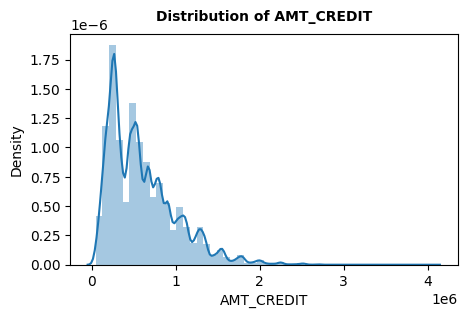

In [56]:
# Visualisation graphique de AMT_CREDIT
plt.figure(figsize = (5,3))
plt.title("Distribution of AMT_CREDIT",
          fontsize = 10, y = 1.02, fontweight = 'bold')
ax = sns.distplot(app_train["AMT_CREDIT"])

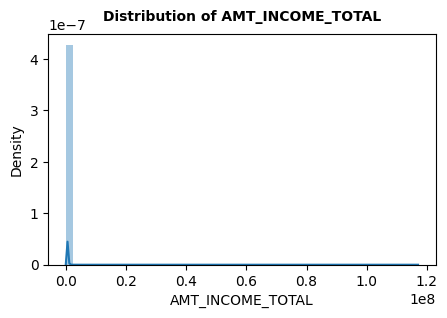

In [57]:
# Visualisation graphique de AMT_INCOME_TOTAL
plt.figure(figsize = (5,3))
plt.title("Distribution of AMT_INCOME_TOTAL",
          fontsize = 10, y = 1.02, fontweight = 'bold')
ax = sns.distplot(app_train["AMT_INCOME_TOTAL"].dropna())

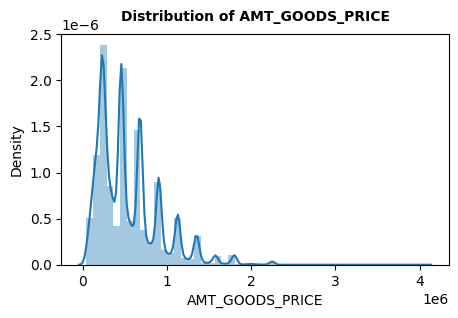

In [58]:
# Visualisation graphique de AMT_GOODS_PRICE
plt.figure(figsize = (5,3))
plt.title("Distribution of AMT_GOODS_PRICE",
          fontsize = 10, y = 1.02, fontweight = 'bold')
ax = sns.distplot(app_train["AMT_GOODS_PRICE"].dropna())

In [59]:
# Comptage du nombre de client par modalité de la target
# 0 : prêt remboursé dans les temps par le client
# 1 : difficultés de paiements de la part du client
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

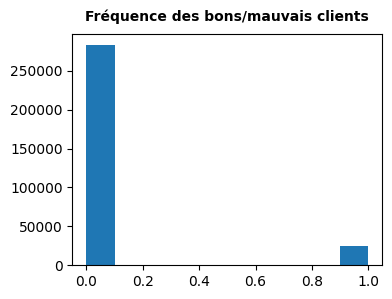

In [60]:
# Visualisation graphique de la distribution des clients
fig = plt.figure(figsize = (4, 3))
plt.hist(app_train['TARGET'])
plt.title('Fréquence des bons/mauvais clients', fontsize = 10,
          y = 1.02, fontweight = 'bold')
fig.savefig(path+ 'Target_histogramme.png', bbox_inches = "tight",
            dpi = 400, transparent = True)

**Observation :**
On peut voir un problème d'équilibre entre les bons et les moins bons clients. Il y a beaucoup plus de bons clients que de moins bons clients.
Ce déséquilibre sera à prendre en compte lors de l'élaboration du modèle de machine learning

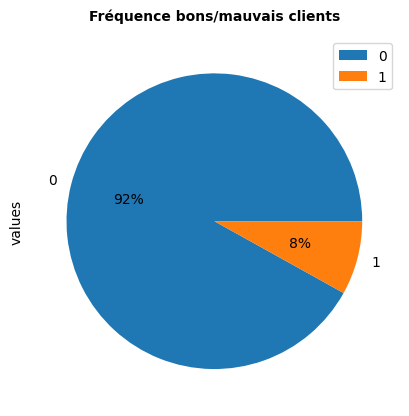

In [61]:
# Visualisation graphique via piechart
tmp = app_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': tmp.index,
                   'values': tmp.values})
df.plot(kind = 'pie', y = 'values', autopct = '%1.0f%%')
ax = plt.title('Fréquence bons/mauvais clients', fontsize = 10,
               y = 1.02, fontweight = 'bold')

## Traitement des anomalies

In [62]:
# Vérification de la colonne 'DAYS_BIRTH' qui est négative
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

**Observation :**
La colonne 'DAYS_BIRTH' est définie relativement à la date de mise en application du prêt, donc elle est négative.
Après avoir divisé par 365 et multiplié par -1, on retrouve l'âge des clients, qui est cohérent.

In [63]:
# Vérification de la colonne 'DAYS_EMPLOYED' qui a une valeur extrême
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

**Observation :**
La valeur max représente 1000 ans...

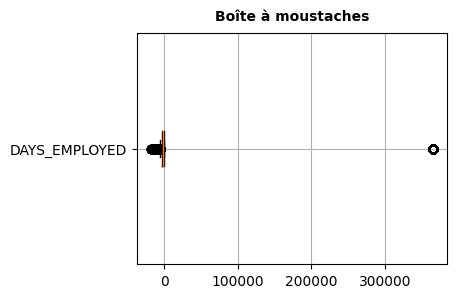

In [64]:
# Visualisation graphique
fig = plt.figure(figsize=(4, 3))
plt.boxplot(app_train['DAYS_EMPLOYED'], vert = False,
            labels=['DAYS_EMPLOYED'])
plt.title("Boîte à moustaches", fontsize = 10,
          y = 1.02, fontweight = 'bold')
plt.grid()
fig.savefig(path + 'DAYS_EMPLOYED_boxplot.png',
            bbox_inches = "tight",
            dpi = 400, transparent = True)

Observations :
Les anomalies seront remplacées par np.nan, puis une colonne indiquant si la valeur 'DAYS_EMPLOYED' était une anomalie ou non sera créée.
Les anomalies seront imputées plus tard par une autre valeur pour la modélisation.

In [65]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans.' \
      % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans.' \
      % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment.' \
      % len(anom))

The non-anomalies default on 8.66% of loans.
The anomalies default on 5.40% of loans.
There are 55374 anomalous days of employment.


There are 9274 anomalies in the test data out of 48744 entries.


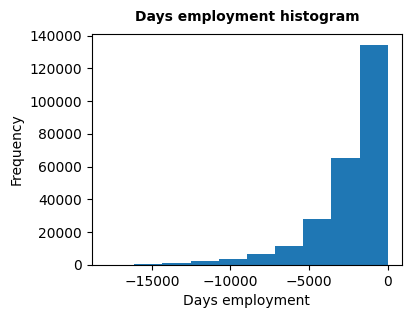

In [66]:
# Création de la colonne 'flag'
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243

# Remplacement des valeurs anormales par np.nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries.' \
      % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

# Visualisation graphique après traitement des anomalies
fig = plt.figure(figsize=(4, 3))
app_train['DAYS_EMPLOYED'].plot.hist()
plt.xlabel('Days employment')
plt.title("Days employment histogram", fontsize = 10,
          y = 1.02, fontweight = 'bold')
fig.savefig(path+'DAYS_EMPLOYED_histogram_après_traitement.png',
            bbox_inches = "tight",
            dpi = 400, transparent = True)

In [67]:
# Remplacement des outliers '365243' dans les colonnes avec 'DAYS'
for col in app_train.columns:
    if "DAYS" in col:
        app_train[col] = app_train[col].replace({365243: np.nan})

for col in app_test.columns:
    if "DAYS" in col:
        app_test[col] = app_test[col].replace({365243: np.nan})

## Correlations

In [68]:
# Création de la matrice de corrélation
corr_matrix = app_train.corr(method = 'pearson')

In [69]:
# Visualisation des corrélations avec la target
correlations = corr_matrix['TARGET'].sort_values(ascending = False)
print('Most Positive Correlations:\n', correlations.head(30))
print('\nMost Negative Correlations:\n', correlations.tail(15))

Most Positive Correlations:
 TARGET                                              1.000000
previous_DAYS_FIRST_DRAWING_max                     0.148409
client_card_CNT_DRAWINGS_CURRENT_max_max            0.101389
client_card_CNT_DRAWINGS_CURRENT_max_mean           0.100921
client_card_CNT_DRAWINGS_CURRENT_max_min            0.100648
previous_DAYS_FIRST_DRAWING_min                     0.095787
bureau_DAYS_CREDIT_mean                             0.089729
client_card_AMT_BALANCE_mean_max                    0.087617
client_card_AMT_BALANCE_mean_mean                   0.087177
client_card_AMT_BALANCE_mean_min                    0.086997
client_card_AMT_TOTAL_RECEIVABLE_mean_max           0.086932
client_card_AMT_RECIVABLE_mean_max                  0.086919
client_card_AMT_RECEIVABLE_PRINCIPAL_mean_max       0.086499
client_card_AMT_TOTAL_RECEIVABLE_mean_mean          0.086490
client_card_AMT_RECIVABLE_mean_mean                 0.086478
client_card_AMT_TOTAL_RECEIVABLE_mean_min           0.08

**Observations :**
Parmi les corrélations positives avec la target, les plus importantes (bien que faibles) sont les statistiques calculées (min, max, mean) sur 'DAYS_FIRST_DRAWING', 'CNT_DRAWINGS_CURRENT', 'DAYS_CREDIT' et d'autres variables provenant des ressources additionnelles. Nous avons aussi 'DAYS_BIRTH' et 'DAYS_EMPLOYED' qui font partie des corrélations les plus importantes. Or, les valeurs de ces dernières variables sont comptées négativement. Les corrélations sont donc réellement négatives.
Parmi les corrélations négatives avec la target, les plus importantes (bien que faibles également) sont 'EXT_SOURCE_1', 'EXT_SOURCE_2' et 'EXT_SOURCE_3'.

### Effets des retraits d'argent au distributeur sur le remboursement d 'un pret

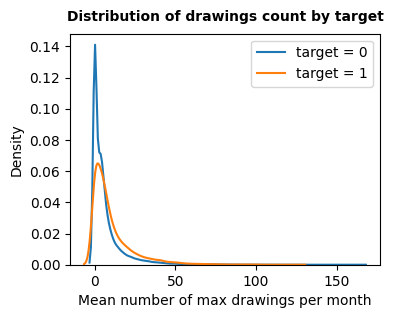

In [70]:
# Visualisation de la distribution de chaque target en fonction du nombre de retraits
# client_card_CNT_DRAWINGS_CURRENT_max_mean représente la moyenne par client du nombre max de retraits par mois
# parmi tous les prêts contractés par le client
fig = plt.figure(figsize = (4, 3))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'client_card_CNT_DRAWINGS_CURRENT_max_mean'],
            label = 'target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'client_card_CNT_DRAWINGS_CURRENT_max_mean'],
            label = 'target = 1')
plt.legend()
plt.xlabel('Mean number of max drawings per month')
plt.ylabel('Density')
plt.title('Distribution of drawings count by target',
          fontsize = 10, y = 1.02, fontweight = 'bold')
fig.savefig(path +'Drawings_distribution_by_target.png',
            bbox_inches = "tight", transparent = True)

Observations :
Il semble que moins le client effectue de retraits, plus il a tendance à rembourser le prêt dans les temps (target = 0), mais la corrélation est très faible.

### Effets de l'age sur le remboursement d 'un pret

In [71]:
# Calcul de la valeur absolue 'DAYS_BIRTH' pour avoir l'âge réel positif
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

Observations :
Plus le client vieillit, plus le client a tendance à rembourser le prêt dans les temps (target = 0)

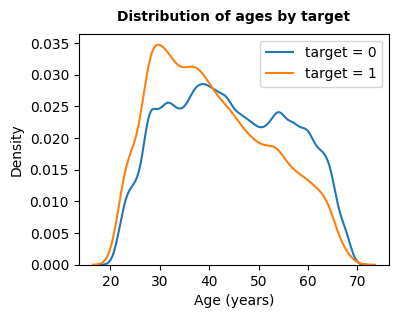

In [72]:
# Visualisation de la distribution de chaque target en fonction de l'âge
fig = plt.figure(figsize = (4, 3))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365,
            label = 'target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365,
            label = 'target = 1')
plt.legend()
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of ages by target',
          fontsize = 10, y = 1.02, fontweight = 'bold')
fig.savefig(path +'Age_distribution_by_target.png',
            bbox_inches = "tight", transparent = True)

Observations :
Le graphique confirme la corrélation : il y a plus de prêts remboursés à temps après 40 ans, et moins avant 40 ans.

In [73]:
# Création d'un dataframe séparé pour une étude plus approfondie
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Discrétisation de l'age en intervalles de 5 ans
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'],
                                  bins = np.linspace(20, 70,
                                                     num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [74]:
# Regroupement par groupe d'âge pour calculer la moyenne par groupe
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

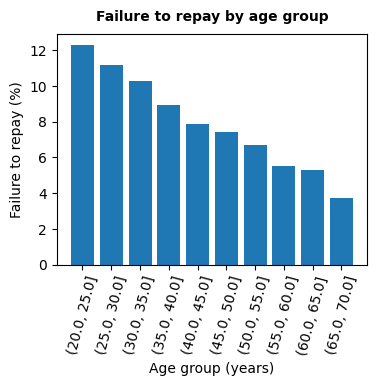

In [75]:
# Visualisation du taux de défaut de paiement en fonction de l'âge
fig = plt.figure(figsize = (4, 3))
plt.bar(age_groups.index.astype(str),
        100 * age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age group (years)')
plt.ylabel('Failure to repay (%)')
plt.title('Failure to repay by age group',
          fontsize = 10, y = 1.02, fontweight = 'bold')
fig.savefig(path + 'Failure_by_age_group.png',
            bbox_inches = "tight", transparent = True)

### Effets du nombre de jours en poste sur l'obtention du pret

In [76]:
# Calcul de la valeur absolue 'DAYS_EMPLOYED' pour avoir le nombre de jours réel positif
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])
app_train['DAYS_EMPLOYED'].corr(app_train['TARGET'])

-0.07495845742543872

Observations :
Plus le client est employé depuis longtemps, plus le client a tendance à rembourser le prêt dans les temps (target = 0).

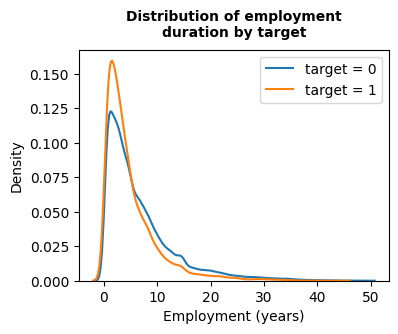

In [77]:
# Visualisation de la distribution de chaque target en fonction de l'âge
fig = plt.figure(figsize = (4, 3))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365,
            label = 'target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365,
            label = 'target = 1')
plt.legend()
plt.xlabel('Employment (years)')
plt.ylabel('Density')
plt.title('Distribution of employment\nduration by target',
          fontsize = 10, y = 1.02, fontweight = 'bold')
fig.savefig(path + 'Employment_distribution_by_target.png',
            bbox_inches = "tight", transparent = True)

Observations :
Le graphique confirme la corrélation : il y a plus de prêts remboursés à temps lorsque le client est employé depuis longtemps.
Malgré tout, l'écart reste très faible.

In [78]:
# Création d'un dataframe séparé pour une étude plus approfondie
employment_data = app_train[['TARGET', 'DAYS_EMPLOYED']]
employment_data['YEARS_EMPLOYED'] = employment_data['DAYS_EMPLOYED'] / 365

# Discrétisation de l'age en intervalles de 5 ans
employment_data['YEARS_BINNED'] = pd.cut(employment_data['YEARS_EMPLOYED'],
                                  bins = np.linspace(0, 50,
                                                     num = 11))
employment_data.head(10)

TARGET  DAYS_EMPLOYED  YEARS_EMPLOYED YEARS_BINNED
0       1          637.0        1.745205   (0.0, 5.0]
1       0         1188.0        3.254795   (0.0, 5.0]
2       0          225.0        0.616438   (0.0, 5.0]
3       0         3039.0        8.326027  (5.0, 10.0]
4       0         3038.0        8.323288  (5.0, 10.0]
5       0         1588.0        4.350685   (0.0, 5.0]
6       0         3130.0        8.575342  (5.0, 10.0]
7       0          449.0        1.230137   (0.0, 5.0]
8       0            NaN             NaN          NaN
9       0         2019.0        5.531507  (5.0, 10.0]

In [79]:
# Regroupement par groupe d'âge pour calculer la moyenne par groupe
employment_groups  = employment_data.groupby('YEARS_BINNED').mean()
employment_groups

TARGET  DAYS_EMPLOYED  YEARS_EMPLOYED
YEARS_BINNED                                         
(0.0, 5.0]    0.105708     864.340763        2.368057
(5.0, 10.0]   0.073714    2630.224689        7.206095
(10.0, 15.0]  0.057752    4466.899670       12.238081
(15.0, 20.0]  0.048484    6306.860448       17.279070
(20.0, 25.0]  0.047573    8092.875701       22.172262
(25.0, 30.0]  0.039903    9961.437122       27.291609
(30.0, 35.0]  0.041258   11791.751418       32.306168
(35.0, 40.0]  0.019231   13517.634615       37.034615
(40.0, 45.0]  0.004762   15325.461905       41.987567
(45.0, 50.0]  0.000000   16862.916667       46.199772

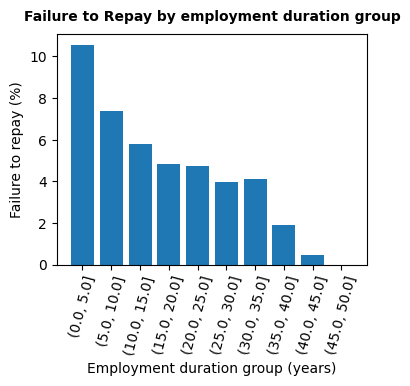

In [80]:
# Visualisation du taux de défaut de paiement en fonction de l'âge
fig = plt.figure(figsize = (4, 3))
plt.bar(employment_groups.index.astype(str),
        100 * employment_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Employment duration group (years)')
plt.ylabel('Failure to repay (%)')
plt.title('Failure to Repay by employment duration group',
          fontsize = 10, y = 1.02, fontweight = 'bold')
fig.savefig(path+'Failure_by_employment_group.png',
            bbox_inches = "tight", transparent = True)

### Effets des sources exterieures

Observations :
Les corrélations négatives les plus fortes sont 'EXT_SOURCE_1', 'EXT_SOURCE_2' et 'EXT_SOURCE_3'.
Ces variables sont des scores normalisés provenant de sources externes.

In [81]:
# Création d'un dataframe séparé pour une étude plus approfondie
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Calcul des corrélations
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

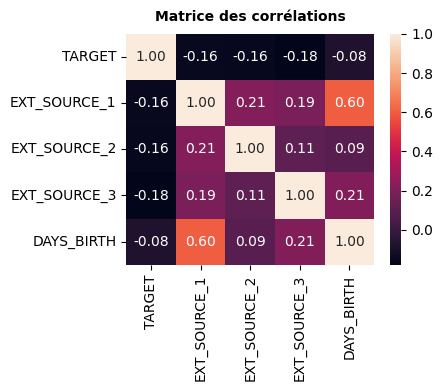

In [82]:
# Représentation via une heatmap
fig = plt.figure(figsize = (4, 3))
sns.heatmap(ext_data_corrs, annot = True, fmt = "0.2f")
plt.title('Matrice des corrélations',
          fontsize = 10, y = 1.02, fontweight = 'bold')
fig.savefig(path+'Matrice_corrélation_EXT_SOURCE.png',
            bbox_inches = "tight", transparent = True)

Observations :
Les features 'EXT_SOURCE' sont toutes négatives, ce qui veut dire que plus leur valeur augmente, plus le client est supposé rembourser son prêt sans problème.
Une plus grande corrélation existe entre 'EXT_SOURCE_1' et 'DAYS_BIRTH', ce qui laisse supposer qu'un des facteurs de 'EXT_SOURCE_1' est l'âge du client.

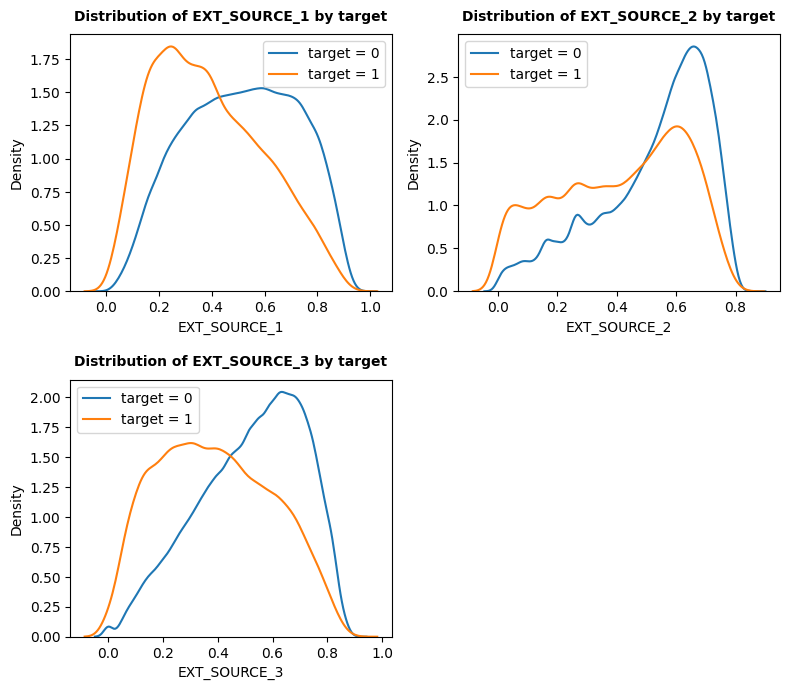

In [83]:
fig = plt.figure(figsize = (8, 7))
for i, source in enumerate(['EXT_SOURCE_1',
                            'EXT_SOURCE_2',
                            'EXT_SOURCE_3']):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source],
                label = 'target = 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source],
                label = 'target = 1')
    plt.title('Distribution of %s by target' % source,
              fontsize = 10, y = 1.02, fontweight = 'bold')
    plt.legend()
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
plt.tight_layout(h_pad = 1.5)
fig.savefig(path +'Distribution_EXT_SOURCE_by_target.png',
            bbox_inches = "tight", transparent = True)

### Retrait des variables correllées entre elles

In [84]:
# Définition d'un seuil de colinéarité
threshold = 0.8

# Dictionnaire qui contiendra les variables corrélées
above_threshold_vars = {}

# Enregistrement des variables au dessus du seuil
for col in corr_matrix:
    above_threshold_vars[col] = list(corr_matrix.index[corr_matrix[col] > threshold])

In [85]:
# Enregistrement des colonnes à supprimer et colonnes déjà vues
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

for key, value in above_threshold_vars.items():
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)

cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  569


In [86]:
# Visualisation de format avant suppression des corrélations
print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 1194)
Testing Features shape:  (48744, 1193)


In [87]:
#app_test=pd.read_csv(path +'app_test.csv')

In [88]:
# Suppression des variables corrélées entre elles
train_corrs_removed = app_train.drop(columns = cols_to_remove)
test_corrs_removed = app_test.drop(columns = cols_to_remove)

In [89]:
# Visualisation de format après suppression des corrélations
print('Training Features shape: ', train_corrs_removed.shape)
print('Testing Features shape: ', test_corrs_removed.shape)

Training Features shape:  (307511, 625)
Testing Features shape:  (48744, 624)


# Features engineering

##Creation de valeurs polynomiales

L'utilisation de caractéristiques polynomiales dans le processus de génie des caractéristiques (feature engineering) en science des données peut être utile dans certaines situations pour capturer des relations non linéaires entre les caractéristiques (features) et la variable cible. Voici quelques raisons pour lesquelles vous pourriez considérer l'utilisation de caractéristiques polynomiales :

1. Modélisation de relations non linéaires : Les modèles linéaires, tels que la régression linéaire, supposent que la relation entre les caractéristiques et la variable cible est linéaire. Cependant, dans de nombreux cas réels, les relations sont plus complexes. L'ajout de caractéristiques polynomiales permet de modéliser des relations non linéaires, ce qui peut améliorer la performance du modèle.
2. Flexibilité : Les caractéristiques polynomiales ajoutent de la flexibilité au modèle en lui permettant de s'adapter à des formes de données plus complexes. Cela peut être particulièrement utile lorsque les données ne suivent pas une tendance linéaire simple.
3. Amélioration de la performance : Dans certains cas, l'ajout de caractéristiques polynomiales peut améliorer la performance prédictive du modèle, en particulier lorsque des relations non linéaires existent réellement dans les données.
4. Capture d'interactions complexes : Les caractéristiques polynomiales peuvent également capturer des interactions complexes entre les caractéristiques. Par exemple, elles peuvent aider à modéliser des interactions du type "l'effet d'une caractéristique X1 sur la variable cible dépend de la valeur de la caractéristique X2".

Cependant, il est important de noter que l'ajout de caractéristiques polynomiales peut également entraîner une augmentation de la dimension des données, ce qui peut rendre le modèle plus complexe et nécessiter davantage de données pour éviter le surapprentissage (overfitting). Il est recommandé de l'utiliser avec parcimonie et de l'évaluer en fonction de l'impact sur la performance du modèle, en utilisant par exemple une validation croisée.

**En résumé, l'utilisation de caractéristiques polynomiales peut être un outil précieux dans le processus de feature engineering pour modéliser des relations non linéaires et des interactions complexes entre les caractéristiques, mais elle doit être appliquée judicieusement en fonction du contexte et des besoins spécifiques du problème de science des données.**

In [90]:
# Création d'un nouveau dataframe avec les features polynomiales
# (utilisation de quelques features les plus corrélées et étudiées plus tôt)
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2',
                           'EXT_SOURCE_3', 'DAYS_BIRTH',
                           'DAYS_EMPLOYED', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2',
                               'EXT_SOURCE_3', 'DAYS_BIRTH',
                               'DAYS_EMPLOYED']]

# Imputation des valeurs manquantes par la médiane
imputer = SimpleImputer(strategy = 'median')
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

# Création du transformer polynomial au degré 3
poly_transformer = PolynomialFeatures(degree = 3)

In [91]:
print('Features shape: ', poly_features.shape)

Features shape:  (307511, 5)


In [92]:
# Fitting du transformer sur les données
poly_transformer.fit(poly_features)

# Transformation des données
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 56)


In [93]:
# Création d'un dataframe avec les nouvelles features + target
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer\
                                       .get_feature_names_out(['EXT_SOURCE_1',
                                                               'EXT_SOURCE_2',
                                                               'EXT_SOURCE_3',
                                                               'DAYS_BIRTH',
                                                               'DAYS_EMPLOYED']))

poly_features['TARGET'] = poly_target
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer\
                                            .get_feature_names_out(['EXT_SOURCE_1',
                                                                    'EXT_SOURCE_2',
                                                                    'EXT_SOURCE_3',
                                                                    'DAYS_BIRTH',
                                                                    'DAYS_EMPLOYED']))

# Calcul des corrélations avec la target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Affichage des corrélations les plus fortes (négatives ou positives)
print('Most Positive Correlations:\n', poly_corrs.tail(5))
print('\nMost Negative Correlations:\n', poly_corrs.head(10))

Most Positive Correlations:
 DAYS_EMPLOYED^2              -0.046234
DAYS_BIRTH DAYS_EMPLOYED^2   -0.045008
DAYS_EMPLOYED^3              -0.035229
TARGET                        1.000000
1                                  NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64


Observations :
Quelques features polynomiales possèdent une corrélation plus grande (en valeur absolue) avec la target.
Elles pourront être utilisées lors de la modélisation.

In [94]:
# Fusion des nouvelles features avec les données initiales
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
poly_features = poly_features.drop(columns = ['EXT_SOURCE_1',
                                              'EXT_SOURCE_2',
                                              'EXT_SOURCE_3',
                                              'DAYS_BIRTH',
                                              'DAYS_EMPLOYED'])

app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR',
                                 how = 'left')
train_corrs_removed_poly = train_corrs_removed.merge(poly_features,
                                                     on = 'SK_ID_CURR',
                                                     how = 'left')
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR',
                               how = 'left')
test_corrs_removed_poly = test_corrs_removed.merge(poly_features_test,
                                                   on = 'SK_ID_CURR',
                                                   how = 'left')

# Alignement du training and testing set
# en ne gardant que les colonnes présentes dans les 2 dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly,
                                                     join = 'inner',
                                                     axis = 1)
train_corrs_removed_poly, test_corrs_removed_poly = train_corrs_removed_poly.align(test_corrs_removed_poly,
                                                                                   join = 'inner',
                                                                                   axis = 1)
app_train_poly['TARGET'] = poly_target
train_corrs_removed_poly['TARGET'] = poly_target


# Visualisation du nouveau nombre de lignes/colonnes
print('Training data with polynomial features shape: ',
      app_train_poly.shape)
print('Testing data with polynomial features shape:  ',
      app_test_poly.shape)
print('Training data with polynomial features and corrs removed shape: ',
      train_corrs_removed_poly.shape)
print('Testing data with polynomial features and corrs removed shape:  ',
      test_corrs_removed_poly.shape)

Training data with polynomial features shape:  (307511, 1240)
Testing data with polynomial features shape:   (48744, 1239)
Training data with polynomial features and corrs removed shape:  (307511, 671)
Testing data with polynomial features and corrs removed shape:   (48744, 670)


## Création de features via les connaissances métier

Nous allons créer quelques features qui semblent importantes lors de l'attribution d'un prêt :
'DEBT_RATIO' : le pourcentage du crédit souscrit relatif aux revenus d'un client ;
'ANNUITY_INCOME_RATIO' : taux d'endettement (chez Home Credit), le pourcentage des mensualités Home Credit relatif aux revenus d'un client ;
'CREDIT_TERM' : la durée du prêt en mois ;
'EMPLOYMENT_AGE_RATIO' : le pourcentage de jours travaillés relatif à l'âge du client.

In [95]:
# Création des variables pour le jeu d'entrainement
# Avec les corrélations
app_train_domain = app_train.copy()
app_train_domain['DEBT_RATIO'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_RATIO'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_RATIO'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

# Sans les variables corrélées entre elles
train_corrs_removed_domain = train_corrs_removed.copy()
train_corrs_removed_domain['DEBT_RATIO'] = train_corrs_removed_domain['AMT_CREDIT'] / train_corrs_removed_domain['AMT_INCOME_TOTAL']
train_corrs_removed_domain['ANNUITY_INCOME_RATIO'] = train_corrs_removed_domain['AMT_ANNUITY'] / train_corrs_removed_domain['AMT_INCOME_TOTAL']
train_corrs_removed_domain['CREDIT_TERM'] = train_corrs_removed_domain['AMT_ANNUITY'] / train_corrs_removed_domain['AMT_CREDIT']
train_corrs_removed_domain['DAYS_EMPLOYED_RATIO'] = train_corrs_removed_domain['DAYS_EMPLOYED'] / train_corrs_removed_domain['DAYS_BIRTH']

# Création des variables pour le jeu de test
# Avec les corrélations
app_test_domain = app_test.copy()
app_test_domain['DEBT_RATIO'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_RATIO'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_RATIO'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [96]:
# Sans les variables corrélées entre elles
test_corrs_removed_domain = test_corrs_removed.copy()
test_corrs_removed_domain['DEBT_RATIO'] = test_corrs_removed_domain['AMT_CREDIT'] / test_corrs_removed_domain['AMT_INCOME_TOTAL']
test_corrs_removed_domain['ANNUITY_INCOME_RATIO'] = test_corrs_removed_domain['AMT_ANNUITY'] / test_corrs_removed_domain['AMT_INCOME_TOTAL']
test_corrs_removed_domain['CREDIT_TERM'] = test_corrs_removed_domain['AMT_ANNUITY'] / test_corrs_removed_domain['AMT_CREDIT']
test_corrs_removed_domain['DAYS_EMPLOYED_RATIO'] = test_corrs_removed_domain['DAYS_EMPLOYED'] / test_corrs_removed_domain['DAYS_BIRTH']

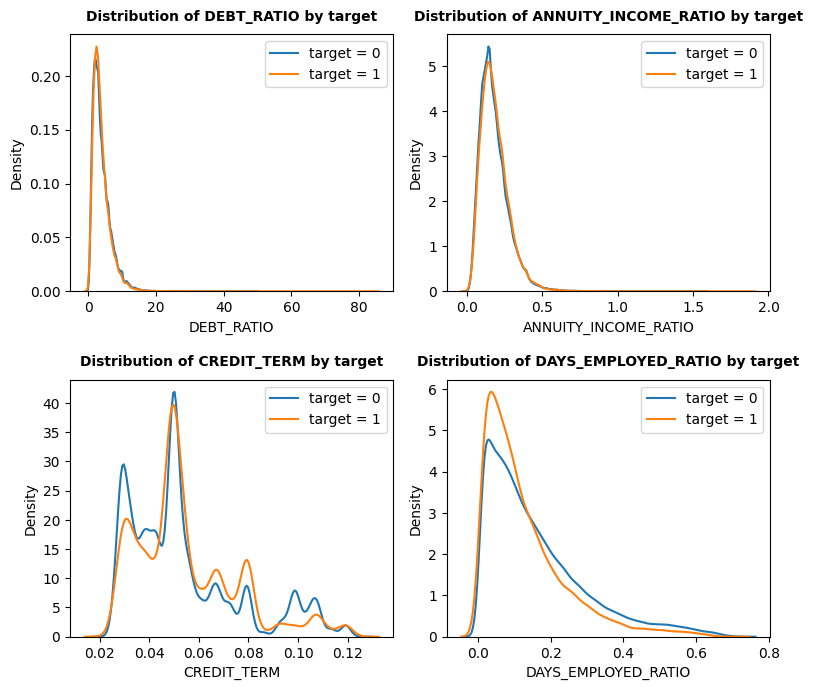

In [97]:
# Visualisation des nouvelles features via kdeplot
fig = plt.figure(figsize = (8, 7))
for i, source in enumerate(['DEBT_RATIO',
                            'ANNUITY_INCOME_RATIO',
                            'CREDIT_TERM',
                            'DAYS_EMPLOYED_RATIO']):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, source],
                label = 'target = 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, source],
                label = 'target = 1')
    plt.title('Distribution of %s by target' % source,
              fontsize = 10, y = 1.02, fontweight = 'bold')
    plt.legend()
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
plt.tight_layout(h_pad = 1.5)
fig.savefig(path +'Distribution_new_features_by_target.png',
            bbox_inches = "tight", transparent = True)

## Enregistrement des données

In [98]:
# Enregistrement des différents jeux de données d'entrainement créés
# app_train avec traitement des anomalies
#app_train.to_csv(path+'app_train_cleaned.csv', index = False)
# app_train avec traitement des anomalies + colinéarités retirées
#train_corrs_removed.to_csv(path+'train_corrs_removed.csv', index = False)
# app_train avec traitement des anomalies + colinéarités retirées + feature engineering polynomial
#train_corrs_removed_poly.to_csv(path+'train_corrs_removed_poly.csv', index = False)
# app_train avec traitement des anomalies + feature engineering polynomial
#app_train_poly.to_csv(path+'app_train_poly.csv', index = False)
# app_train avec traitement des anomalies + feature engineering métier
#app_train_domain.to_csv(path+'app_train_domain.csv', index = False)
# app_train avec traitement des anomalies + colinéarités retirées + feature engineering métier
#train_corrs_removed_domain.to_csv(path+'train_corrs_removed_domain.csv', index = False)

# Modelisations

Métriques utilisées pour évaluer les modèles :
- accuracy : proportion de points correctement prédits (peut être faussée si utilisation d'un jeu de donnée déséquilibré comme dans notre cas) ;
- precision : proportion de points positifs correctement prédits parmi les points que l’on a prédits positifs (= TP/(TP+FP)) ;
- recall : proportion de points positifs correctement prédits parmi les points réellement positifs (=TP/(TP+FN)) ;
- F1-score : moyenne harmonique entre la précision et le recall (= 2×(precision×rappel)/(precision+rappel) = 2TP/(2TP+FP+FN)) ;
- F2-score : F2 = 5×(precision×rappel)/(4×precision+rappel) ce qui donne plus de poids à la précision que pour le F1-score ;
- AUC_ROC : la courbe ROC représente les taux de TP (recall) et de FP (= FP/(FP+TN)) pour différents seuils de classification. AUC mesure l'aire sous la courbe. Un modèle dont les prédictions sont totalement fausses a un AUC de 0,0. Un modèle dont les prédictions sont correctes a un AUC de 1,0. L'AUC est indépendante des seuils de classification (or nous allons jouer sur les seuils de classification pour limiter au maximum les FN donc ne sera pas utiles sur tous les modèles...).
Commençons les modélisations avec le dataset cleané sans les corrélations enlevées et la création de nouvelles features :

In [99]:
# Chargement du dataset cleané pour modélisation
app_train_cleaned = pd.read_csv(path +'app_train_cleaned.csv')

In [100]:
#app_train_cleaned['DAYS_EMPLOYED_ANOM'] = app_train_cleaned['DAYS_EMPLOYED_ANOM'].astype(int)

In [101]:
# Initialisation de la liste qui contiendra les résultats de chaque modèle à l'aide de la fonction scores()
results = []

In [102]:
# Suppression de la target
app_train_target = app_train_cleaned['TARGET']
app_train_cleaned = app_train_cleaned.drop(columns = ['SK_ID_CURR', 'TARGET','DAYS_EMPLOYED_ANOM'])

In [103]:
features = app_train_cleaned.columns

In [104]:
app_train_cleaned.head(5)

NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                   0             0                1             0   
1                   0             0                0             0   
2                   1             1                1             0   
3                   0             0                1             0   
4                   0             0                1             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          202500.0    406597.5      24700.5         351000.0   
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461          637.0            -3648.0   
1                    0.003541       16765         1188.0            -1186.0   
2                    0.010032       19046          225.0            -4260.0   
3                    0.008019       19005         3039.0            -9833.0   
4                    0.028663       19932         3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0           NaN   
3                       0                        0           NaN   
4                       1                        1           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.262949      0.139376          0.0247            0.0369   
1      0.622246           NaN          0.0959            0.0529   
2      0.555912      0.729567        

In [105]:
# Imputation des valeurs manquantes par la médiane
imputer = SimpleImputer(strategy = 'median')
imputer.fit(app_train_cleaned)
app_train_cleaned = imputer.transform(app_train_cleaned)

In [106]:
#from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
#numeric_columns = app_train_cleaned.select_dtypes(include=['number'])
#categorical_columns = app_train_cleaned.select_dtypes(exclude=['number'])

# Convert boolean columns to strings
#categorical_columns = categorical_columns.astype(str)

# Impute missing values in numeric columns with median
#numeric_imputer = SimpleImputer(strategy='median')
#numeric_columns_imputed = numeric_imputer.fit_transform(numeric_columns)
#numeric_columns_imputed = pd.DataFrame(numeric_columns_imputed, columns=numeric_columns.columns)

# Impute missing values in categorical columns with most frequent value
#categorical_imputer = SimpleImputer(strategy='most_frequent')
#categorical_columns_imputed = categorical_imputer.fit_transform(categorical_columns)
#categorical_columns_imputed = pd.DataFrame(categorical_columns_imputed, columns=categorical_columns.columns)

# Concatenate the imputed numeric and categorical columns
#app_train_cleaned = pd.concat([numeric_columns_imputed, categorical_columns_imputed], axis=1)


In [107]:
# Splitting du jeu train en train+val
train, val, train_labels, val_labels = train_test_split(app_train_cleaned,
                                                        app_train_target,
                                                        test_size = 0.2,
                                                        stratify = app_train_target,
                                                        random_state = 56)

In [108]:
print('Training shape: ', train.shape)
print('Validation shape: ', val.shape)

Training shape:  (246008, 1191)
Validation shape:  (61503, 1191)


## Baseline Dummy Classifier

In [109]:
# Création du classifieur
dummy_clf = DummyClassifier(strategy = "stratified")

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.853
Precision score:   0.0852
Recall score:      0.0838
F1 score:          0.0845
F2 score:          0.084
ROCAUC score:      0.502


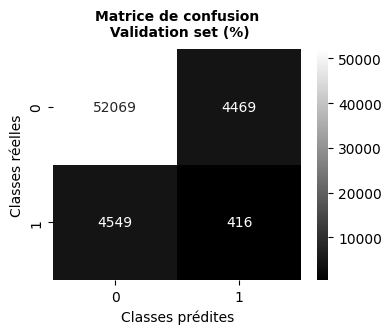

classifier  TN_val  FP_val  FN_val  TP_val   cost  train_accuracy  \
0      Dummy   52069    4469    4549     416  49959         0.85157   

   val_accuracy  train_precision  val_precision  train_recall  val_recall  \
0      0.853373         0.081427       0.085159      0.081571    0.083787   

   train_F1_score  val_F1_score  train_F2_score  val_F2_score  train_roc_auc  \
0        0.081499      0.084467        0.081542      0.084057       0.500381   

   val_roc_auc  train_time  predict_time  
0     0.502371    0.008428      0.004601

In [110]:
# Calcul des différents scores et compilation des scores du modèle dans un dataframe
scores('Dummy', dummy_clf, train, val,
       train_labels, val_labels, results)

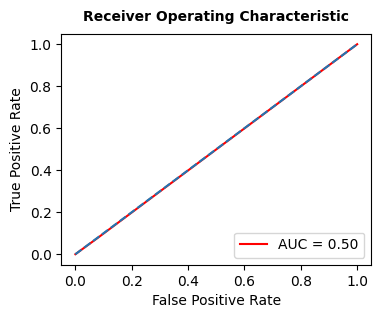

In [111]:
# Représentation graphique de la ROC_curve
ROC_curve('Dummy', dummy_clf, val, val_labels)

Observations :
Nous obtenons une ROC_AUC de 0,5, comme attendu, l'algorithme Dummy n'est pas informatif

## Regression Logistic

In [112]:
# Création du classifieur
log_reg = LogisticRegression(C = 0.0001)

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.919
Precision score:   0.19
Recall score:      0.000806
F1 score:          0.0016
F2 score:          0.001
ROCAUC score:      0.594


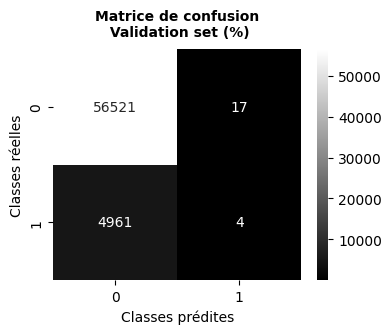

classifier  TN_val  FP_val  FN_val  TP_val   cost  train_accuracy  \
0                Dummy   52069    4469    4549     416  49959        0.851570   
1  Logistic regression   56521      17    4961       4  49627        0.919108   

   val_accuracy  train_precision  val_precision  train_recall  val_recall  \
0      0.853373         0.081427       0.085159      0.081571    0.083787   
1      0.919061         0.243590       0.190476      0.000957    0.000806   

   train_F1_score  val_F1_score  train_F2_score  val_F2_score  train_roc_auc  \
0        0.081499      0.084467        0.081542      0.084057       0.500381   
1        0.001906      0.001604        0.001195      0.001006       0.598829   

   val_roc_auc  train_time  predict_time  
0     0.502371    0.008428      0.004601  
1     0.593705   19.870827      0.090965

In [113]:
# Calcul des différents scores et compilation des scores du modèle dans un dataframe
scores('Logistic regression', log_reg, train, val,
       train_labels, val_labels, results)

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.919
Precision score:   0.19
Recall score:      0.000806
F1 score:          0.0016
F2 score:          0.001
ROCAUC score:      0.594


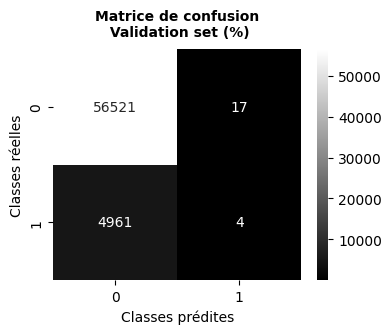

classifier  TN_val  FP_val  FN_val  TP_val   cost  train_accuracy  \
0                Dummy   52069    4469    4549     416  49959        0.851570   
1  Logistic regression   56521      17    4961       4  49627        0.919108   
2  Logistic regression   56521      17    4961       4  49627        0.919108   

   val_accuracy  train_precision  val_precision  train_recall  val_recall  \
0      0.853373         0.081427       0.085159      0.081571    0.083787   
1      0.919061         0.243590       0.190476      0.000957    0.000806   
2      0.919061         0.243590       0.190476      0.000957    0.000806   

   train_F1_score  val_F1_score  train_F2_score  val_F2_score  train_roc_auc  \
0        0.081499      0.084467        0.081542      0.084057       0.500381   
1        0.001906      0.001604        0.001195      0.001006       0.598829   
2        0.001906      0.001604        0.001195      0.001006       0.598829   

   val_roc_auc  train_time  predict_time  
0     0.502371    0.008428      0.004601  
1     0.593705   19.870827      0.090965  
2     0.593705   19.791287      0.088204

In [114]:
# Calcul des différents scores et compilation des scores du modèle dans un dataframe
scores('Logistic regression', log_reg, train, val,
       train_labels, val_labels, results)

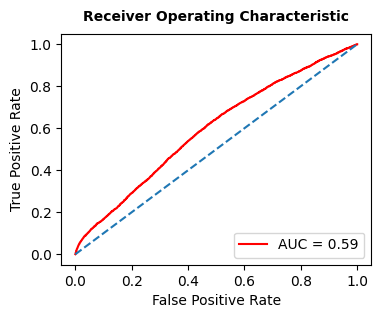

In [115]:
# Représentation graphique de la ROC_curve
ROC_curve('Logistic regression', log_reg, val, val_labels)

Observations :
La ROC_AUC est légèrement supérieure à celle du classifieur Dummy.
Néanmois, elle reste faible et beaucoup de FN sont prédits par rapport aux FP, or nous souhaitons limiter les FN.

## Light GBM

### LightGBM simple sans équilibrage de la target

In [116]:
# Création du modèle
lgb_simple = lgb.LGBMClassifier(objective = 'binary',
                               boosting_type = 'goss',
                               n_estimators = 10000,
                               class_weight = None,
                                verbose=100,
                                early_stopping_round= 200)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.533729 seconds, init for row-wise cost 1.380601 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.520572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 156762
[LightGBM] [Info] Number of data points in t

2023/10/08 16:55:51 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpdoh1lqm1/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.919
Precision score:   0.517
Recall score:      0.0441
F1 score:          0.0813
F2 score:          0.054
ROCAUC score:      0.773


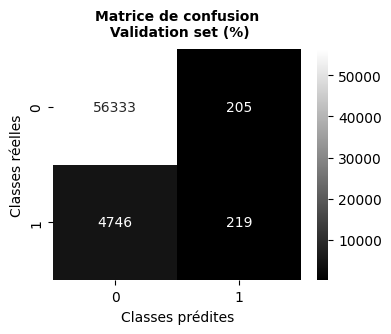

classifier  TN_val  FP_val  FN_val  TP_val   cost  train_accuracy  \
0                Dummy   52069    4469    4549     416  49959        0.851570   
1  Logistic regression   56521      17    4961       4  49627        0.919108   
2  Logistic regression   56521      17    4961       4  49627        0.919108   
3             LightGBM   56333     205    4746     219  47665        0.923007   

   val_accuracy  train_precision  val_precision  train_recall  val_recall  \
0      0.853373         0.081427       0.085159      0.081571    0.083787   
1      0.919061         0.243590       0.190476      0.000957    0.000806   
2      0.919061         0.243590       0.190476      0.000957    0.000806   
3      0.919500         0.771091       0.516509      0.065811    0.044109   

   train_F1_score  val_F1_score  train_F2_score  val_F2_score  train_roc_auc  \
0        0.081499      0.084467        0.081542      0.084057       0.500381   
1        0.001906      0.001604        0.001195      0.001006       0.598829   
2        0.001906      0.001604        0.001195      0.001006       0.598829   
3        0.121271      0.081277        0.080545      0.053983       0.837044   

   val_roc_auc  train_time  predict_time  
0     0.502371    0.008428      0.004601  
1     0.593705   19.870827      0.090965  
2     0.593705   19.791287      0.088204  
3     0.772729   82.002554      0.237686

In [117]:
# Calcul des différents scores et compilation des scores du modèle dans un dataframe
scores('LightGBM', lgb_simple, train, val,
        train_labels, val_labels, results,
        fit_params = {
            'eval_set': [(train, train_labels), (val, val_labels)],
            'eval_metric': 'auc'
        })

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


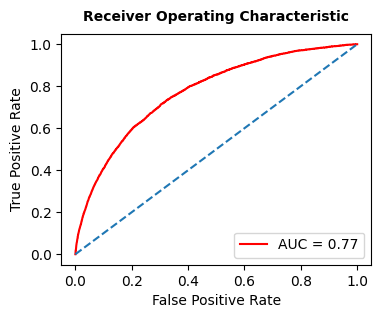

In [118]:
# Représentation graphique de la ROC_curve
ROC_curve('LightGBM', lgb_simple, val, val_labels)

Observations :
Nous remarquons qu'à cause de jeu de données non équilibré, la plupart des prédictions sont négatives (classe 0).
Nous avons par conséquent beaucoup de FN. Nous allons maintenant essayer des méthodes de ré-équilibrage de la target.

### Equilibrage de la target

#### Méthode n°1 : class_weight de LGBMClassifier

In [119]:
# Création du modèle
lgb_balanced = lgb.LGBMClassifier(objective = 'binary',
                                  boosting_type = 'goss',
                                  n_estimators = 10000,
                                  verbose=100,
                                  early_stopping_rounds=200,
                                  class_weight = 'balanced')

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.532095 seconds, init for row-wise cost 1.485479 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.649304 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.743
Precision score:   0.189
Recall score:      0.662
F1 score:          0.294
F2 score:          0.44
ROCAUC score:      0.779


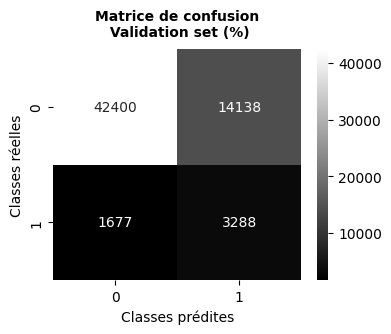

classifier  TN_val  FP_val  FN_val  TP_val   cost  train_accuracy  \
0                Dummy   52069    4469    4549     416  49959        0.851570   
1  Logistic regression   56521      17    4961       4  49627        0.919108   
2  Logistic regression   56521      17    4961       4  49627        0.919108   
3             LightGBM   56333     205    4746     219  47665        0.923007   
4    LightGBM_balanced   42400   14138    1677    3288  30908        0.762016   

   val_accuracy  train_precision  val_precision  train_recall  val_recall  \
0      0.853373         0.081427       0.085159      0.081571    0.083787   
1      0.919061         0.243590       0.190476      0.000957    0.000806   
2      0.919061         0.243590       0.190476      0.000957    0.000806   
3      0.919500         0.771091       0.516509      0.065811    0.044109   
4      0.742858         0.224129       0.188684      0.791289    0.662236   

   train_F1_score  val_F1_score  train_F2_score  val_F2_score  train_roc_auc  \
0        0.081499      0.084467        0.081542      0.084057       0.500381   
1        0.001906      0.001604        0.001195      0.001006       0.598829   
2        0.001906      0.001604        0.001195      0.001006       0.598829   
3        0.121271      0.081277        0.080545      0.053983       0.837044   
4        0.349315      0.293689        0.525388      0.440916       0.857101   

   val_roc_auc  train_time  predict_time  
0     0.502371    0.008428      0.004601  
1     0.593705   19.870827      0.090965  
2     0.593705   19.791287      0.088204  
3     0.772729   82.002554      0.237686  
4     0.778999   98.172449      0.327585

In [120]:
# Calcul des différents scores et compilation des scores du modèle dans un dataframe
scores('LightGBM_balanced', lgb_balanced, train, val,
        train_labels, val_labels, results,
        fit_params = {
                      'eval_set': [(train, train_labels), (val, val_labels)],
                      'eval_metric': 'auc'})

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


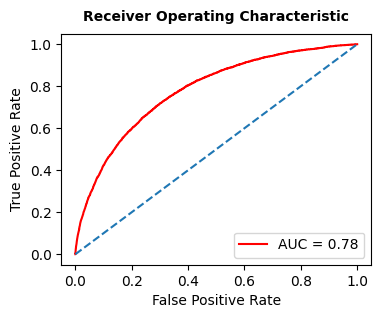

In [121]:
# Représentation graphique de la ROC_curve
ROC_curve('LightGBM_balanced', lgb_balanced, val, val_labels)

Observations :
Nous observons une nette diminution du nombre de FN.

#### Méthode n°2 : under-sampling de la librairie Imbalanced-Learn

Nous allons tester plusieurs stratégies de sampling :
1 . sampling_strategy = 'majority'

In [122]:
# Définition de la stratégie d'undersampling
undersample = RandomUnderSampler(sampling_strategy = 'majority')

In [123]:
# Fitting et sampling sur le jeu d'entrainement
train_under, train_labels_under = undersample.fit_resample(train,
                                                           train_labels)

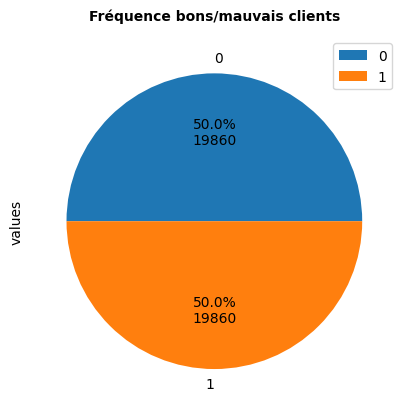

In [124]:
# Visualisation graphique via piechart
tmp = train_labels_under.value_counts()
df = pd.DataFrame({'labels': tmp.index,
                   'values': tmp.values})

total = df['values'].sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

df.plot(kind = 'pie', y = 'values', autopct = fmt)
ax = plt.title('Fréquence bons/mauvais clients', fontsize = 10,
               y = 1.02, fontweight = 'bold')

In [125]:
# Création du modèle
lgb_under_maj = lgb.LGBMClassifier(objective = 'binary',
                               boosting_type = 'goss',
                               n_estimators = 10000,
                               verbose=100,
                                early_stopping_rounds=200,
                               class_weight = None)

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 19860
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.861854
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.591603
[LightGBM] [Debug] init for col-wise cost 0.088583 seconds, init for row-wise cost 0.232395 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.258048 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.694
Precision score:   0.167
Recall score:      0.698
F1 score:          0.269
F2 score:          0.43
ROCAUC score:      0.764


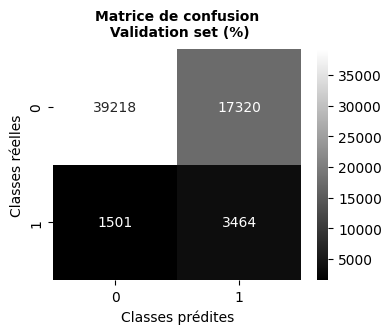

classifier  TN_val  FP_val  FN_val  TP_val   cost  train_accuracy  \
0                Dummy   52069    4469    4549     416  49959        0.851570   
1  Logistic regression   56521      17    4961       4  49627        0.919108   
2  Logistic regression   56521      17    4961       4  49627        0.919108   
3             LightGBM   56333     205    4746     219  47665        0.923007   
4    LightGBM_balanced   42400   14138    1677    3288  30908        0.762016   
5   LightGBM_under_maj   39218   17320    1501    3464  32330        0.739225   

   val_accuracy  train_precision  val_precision  train_recall  val_recall  \
0      0.853373         0.081427       0.085159      0.081571    0.083787   
1      0.919061         0.243590       0.190476      0.000957    0.000806   
2      0.919061         0.243590       0.190476      0.000957    0.000806   
3      0.919500         0.771091       0.516509      0.065811    0.044109   
4      0.742858         0.224129       0.188684      0.791289    0.662236   
5      0.693982         0.737788       0.166667      0.742246    0.697684   

   train_F1_score  val_F1_score  train_F2_score  val_F2_score  train_roc_auc  \
0        0.081499      0.084467        0.081542      0.084057       0.500381   
1        0.001906      0.001604        0.001195      0.001006       0.598829   
2        0.001906      0.001604        0.001195      0.001006       0.598829   
3        0.121271      0.081277        0.080545      0.053983       0.837044   
4        0.349315      0.293689        0.525388      0.440916       0.857101   
5        0.740010      0.269059        0.741350      0.426139       0.817849   

   val_roc_auc  train_time  predict_time  
0     0.502371    0.008428      0.004601  
1     0.593705   19.870827      0.090965  
2     0.593705   19.791287      0.088204  
3     0.772729   82.002554      0.237686  
4     0.778999   98.172449      0.327585  
5     0.763836   34.318716      0.506148

In [126]:
# Calcul des différents scores et compilation des scores du modèle dans un dataframe
scores('LightGBM_under_maj', lgb_under_maj, train_under, val,
        train_labels_under, val_labels, results,
        fit_params = {
                      'eval_set': [(train, train_labels), (val, val_labels)],
                      'eval_metric': 'auc'})

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


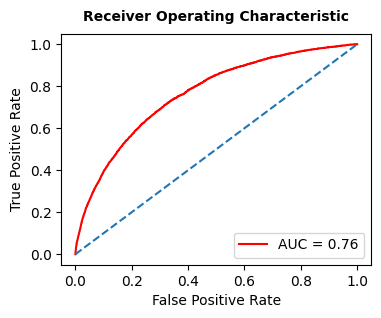

In [127]:
# Représentation graphique de la ROC_curve
ROC_curve('LightGBM_under', lgb_under_maj, val, val_labels)

Observations :
Nous avons à nouveau une diminution du nombre de FN, mais une augmentation non négligeable du nombre de FP.

#### sampling_strategy = 0.2, 0.4, 0.6 et 0.8

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 99300
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.867215
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.605943
[LightGBM] [Debug] init for col-wise cost 0.408569 seconds, init for row-wise cost 0.977571 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.109869 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.912
Precision score:   0.372
Recall score:      0.139
F1 score:          0.202
F2 score:          0.16
ROCAUC score:      0.763


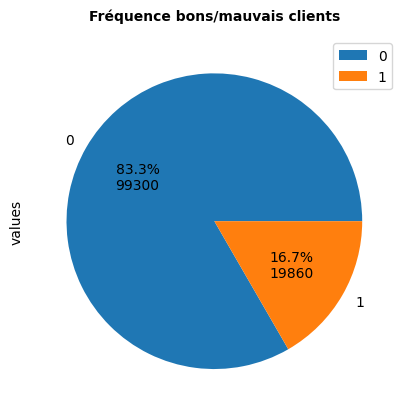

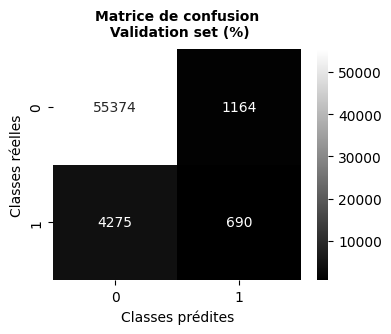

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 49650
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.866454
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.596864
[LightGBM] [Debug] init for col-wise cost 0.151324 seconds, init for row-wise cost 0.375031 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.419516 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.863
Precision score:   0.259
Recall score:      0.371
F1 score:          0.305
F2 score:          0.34
ROCAUC score:      0.762


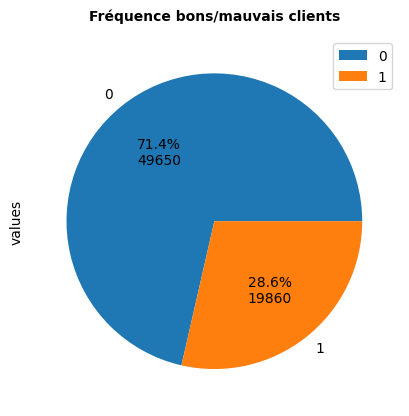

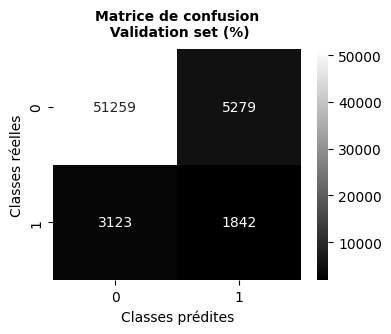

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 33100
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.862678
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.595435
[LightGBM] [Debug] init for col-wise cost 0.153728 seconds, init for row-wise cost 0.490851 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.552347 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.808
Precision score:   0.214
Recall score:      0.518
F1 score:          0.303
F2 score:          0.4
ROCAUC score:      0.763


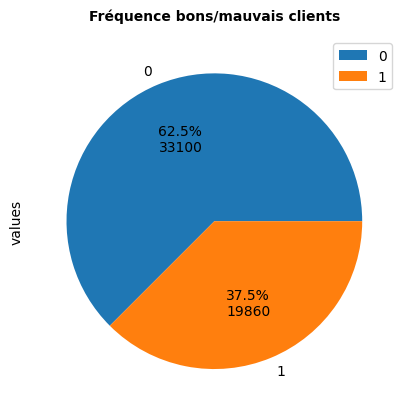

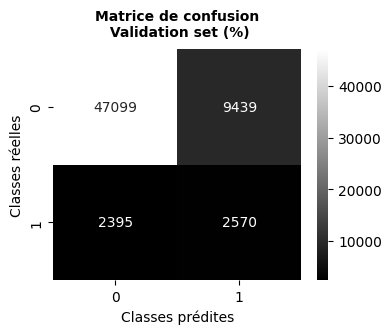

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 24825
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.863020
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.588538
[LightGBM] [Debug] init for col-wise cost 0.099647 seconds, init for row-wise cost 0.276060 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.304340 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.754
Precision score:   0.188
Recall score:      0.615
F1 score:          0.288
F2 score:          0.42
ROCAUC score:      0.761


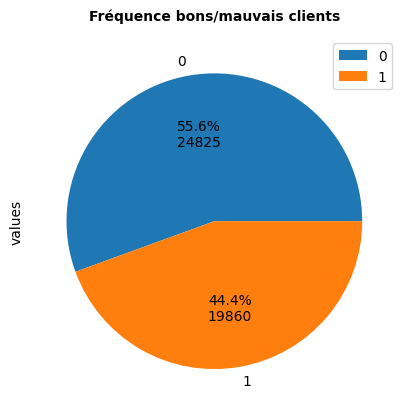

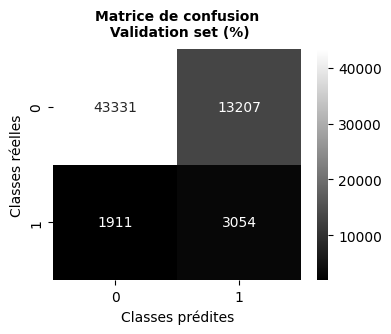

In [128]:
for i, sampling_strat in enumerate([0.2, 0.4, 0.6, 0.8]):
    # Définition de la stratégie d'undersampling
    undersample = RandomUnderSampler(sampling_strategy = sampling_strat)
    # Fitting et sampling sur le jeu d'entrainement
    train_under, train_labels_under = undersample.fit_resample(train,
                                                               train_labels)

    # Visualisation graphique via piechart
    tmp = train_labels_under.value_counts()
    df = pd.DataFrame({'labels': tmp.index,
                       'values': tmp.values})
    total = df['values'].sum()
    df.plot(kind = 'pie', y = 'values', autopct = fmt)
    ax = plt.title('Fréquence bons/mauvais clients', fontsize = 10,
                   y = 1.02, fontweight = 'bold')

    # Création du modèle
    lgb_under = lgb.LGBMClassifier(objective = 'binary',
                                   boosting_type = 'goss',
                                   n_estimators = 10000,
                                   class_weight = None,
                                   early_stopping_rounds=200,
                                   verbose=100)
    # Calcul des différents scores et compilation des scores du modèle dans un dataframe
    scores(f'LightGBM_under_0.{(i+1)*2}', lgb_under, train_under, val,
        train_labels_under, val_labels, results,
        fit_params = {
                      'eval_set': [(train, train_labels), (val, val_labels)],
                      'eval_metric': 'auc'})

Observations :
Cette méthode ne donne pas de meilleurs résultats en termes de nombre de FN/FP.

#### sampling_strategy = 0.2, 0.4, 0.6 et 0.8 + class_weight = 'balanced'

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 99300
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.869367
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.598717
[LightGBM] [Debug] init for col-wise cost 0.409865 seconds, init for row-wise cost 1.010377 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.120072 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.738
Precision score:   0.183
Recall score:      0.65
F1 score:          0.286
F2 score:          0.43
ROCAUC score:      0.77


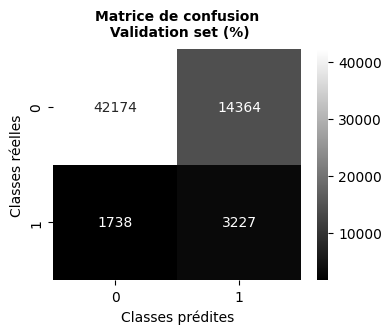

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 49650
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.864795
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.592820
[LightGBM] [Debug] init for col-wise cost 0.237518 seconds, init for row-wise cost 0.639205 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.716864 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.718
Precision score:   0.175
Recall score:      0.672
F1 score:          0.278
F2 score:          0.43
ROCAUC score:      0.768


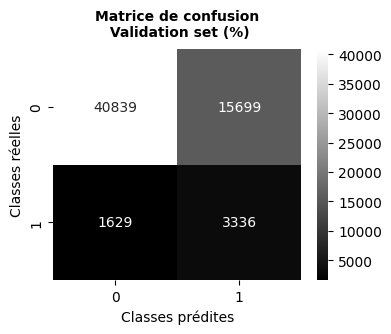

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 33100
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.864442
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.596659
[LightGBM] [Debug] init for col-wise cost 0.123277 seconds, init for row-wise cost 0.323033 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.371295 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.713
Precision score:   0.173
Recall score:      0.678
F1 score:          0.276
F2 score:          0.43
ROCAUC score:      0.763


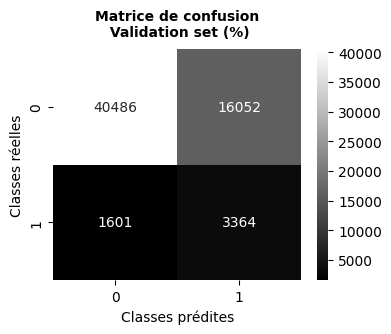

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 24825
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.862398
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.594878
[LightGBM] [Debug] init for col-wise cost 0.100677 seconds, init for row-wise cost 0.304057 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.333385 seconds.
Yo

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.701
Precision score:   0.168
Recall score:      0.686
F1 score:          0.27
F2 score:          0.42
ROCAUC score:      0.763


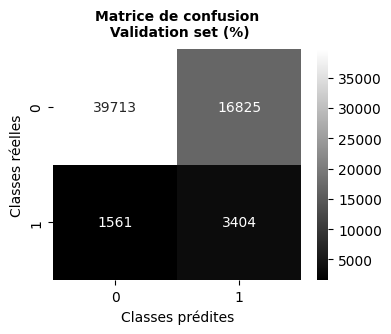

In [129]:
for i, sampling_strat in enumerate([0.2, 0.4, 0.6, 0.8]):
    # Définition de la stratégie d'undersampling
    undersample = RandomUnderSampler(sampling_strategy = sampling_strat)
    # Fitting et sampling sur le jeu d'entrainement
    train_under, train_labels_under = undersample.fit_resample(train,
                                                               train_labels)
    # Création du modèle
    lgb_under = lgb.LGBMClassifier(objective = 'binary',
                                   boosting_type = 'goss',
                                   n_estimators = 10000,
                                   class_weight = 'balanced',
                                   early_stopping_rounds=200,
                                   verbose=100)
    # Calcul des différents scores et compilation des scores du modèle dans un dataframe
    scores(f'LightGBM_under_0.{(i+1)*2}_balanced', lgb_under, train_under, val,
        train_labels_under, val_labels, results,
        fit_params = {
                      'eval_set': [(train, train_labels), (val, val_labels)],
                      'eval_metric': 'auc'})

Observations :
En associant l'undersampling (sampling_strategy = sampling_strat) avec la class_weight = 'balanced' de LightGBM, nous obtenons de meilleurs résultats

### SMOTE

In [130]:
# Définition de la stratégie d'oversampling
oversample = SMOTE()

In [131]:
# Fitting et sampling sur le jeu d'entrainement
train_smote, train_labels_smote = oversample.fit_resample(train,
                                                          train_labels)

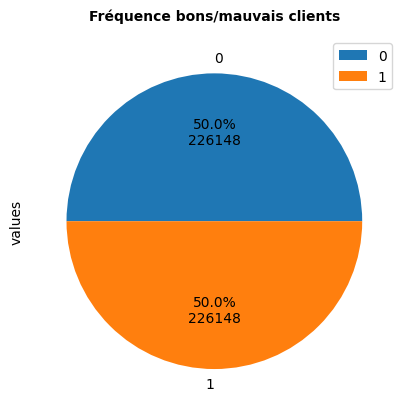

In [132]:
# Visualisation graphique via piechart
tmp = train_labels_smote.value_counts()
df = pd.DataFrame({'labels': tmp.index,
                   'values': tmp.values})
total = df['values'].sum()
df.plot(kind = 'pie', y = 'values', autopct = fmt)
ax = plt.title('Fréquence bons/mauvais clients', fontsize = 10,
               y = 1.02, fontweight = 'bold')

In [133]:
# Création du modèle
lgb_smote = lgb.LGBMClassifier(objective = 'binary',
                               boosting_type = 'goss',
                               n_estimators = 10000,
                               class_weight = None,
                               early_stopping_rounds=200,
                                   verbose=100)

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.869729
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.579069
[LightGBM] [Debug] init for col-wise cost 1.389674 seconds, init for row-wise cost 5.288601 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 5.660598 seconds.


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.919
Precision score:   0.52
Recall score:      0.0344
F1 score:          0.0646
F2 score:          0.042
ROCAUC score:      0.775


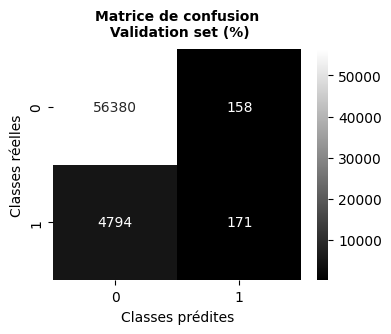

classifier  TN_val  FP_val  FN_val  TP_val   cost  \
0                         Dummy   52069    4469    4549     416  49959   
1           Logistic regression   56521      17    4961       4  49627   
2           Logistic regression   56521      17    4961       4  49627   
3                      LightGBM   56333     205    4746     219  47665   
4             LightGBM_balanced   42400   14138    1677    3288  30908   
5            LightGBM_under_maj   39218   17320    1501    3464  32330   
6            LightGBM_under_0.2   55374    1164    4275     690  43914   
7            LightGBM_under_0.4   51259    5279    3123    1842  36509   
8            LightGBM_under_0.6   47099    9439    2395    2570  33389   
9            LightGBM_under_0.8   43331   13207    1911    3054  32317   
10  LightGBM_under_0.2_balanced   42174   14364    1738    3227  31744   
11  LightGBM_under_0.4_balanced   40839   15699    1629    3336  31989   
12  LightGBM_under_0.6_balanced   40486   16052    1601    3364  32062   
13  LightGBM_under_0.8_balanced   39713   16825    1561    3404  32435   
14               LightGBM_smote   56380     158    4794     171  48098   

    train_accuracy  val_accuracy  train_precision  val_precision  \
0         0.851570      0.853373         0.081427       0.085159   
1         0.919108      0.919061         0.243590       0.190476   
2         0.919108      0.919061         0.243590       0.190476   
3         0.923007      0.919500         0.771091       0.516509   
4         0.762016      0.742858         0.224129       0.188684   
5         0.739225      0.693982         0.737788       0.166667   
6         0.848204      0.911565         0.681856       0.372168   
7         0.782808      0.863389         0.699205       0.258672   
8         0.750264      0.807587         0.707546       0.214006   
9         0.736377      0.754191         0.720813       0.187811   
10        0.759626      0.738192         0.386428       0.183446   
11        0.745591      0.718258         0.539985       0.175256   
12        0.736688      0.712973         0.627396       0.173259   
13        0.744187      0.701055         0.697280       0.168273   
14        0.957289      0.919484         0.998208       0.519757   

    train_recall  val_recall  train_F1_score  val_F1_score  train_F2_score  \
0       0.081571    0.083787        0.081499      0.084467        0.081542   
1       0.000957    0.000806        0.001906      0.001604        0.001195   
2       0.000957    0.000806        0.001906      0.001604        0.001195   
3       0.065811    0.044109        0.121271      0.081277        0.080545   
4       0.791289    0.662236        0.349315      0.293689        0.525388   
5       0.742246    0.697684        0.740010      0.269059        0.741350   
6       0.167271    0.138973        0.268640      0.202376        0.197006   
7       0.420896    0.370997        0.525475      0.304815        0.457301   
8       0.569386    0.517623        0.630992      0.302816        0.592526   
9       0.664048    0.615106        0.691267      0.287760        0.674675   
10      0.752367    0.649950        0.510602      0.286132        0.632562   
11      0.739829    0.671903        0.624304      0.278000        0.688842   
12      0.733384    0.677543        0.676262      0.275953        0.709415   
13      0.750050    0.685599        0.722703      0.270223        0.738867   
14      0.916223    0.034441        0.955460      0.064601        0.931525   

    val_F2_score  train_roc_auc  val_roc_auc  train_time  predict_time  
0       0.084057       0.500381     0.502371    0.008428      0.004601  
1       0.001006       0.598829     0.593705   19.870827      0.090965  
2       0.001006       0.598829     0.593705   19.791287      0.088204  
3       0.053983       0.837044     0.772729   82.002554      0.237686  
4       0.440916       0.857101     0.778999   98.172449      0.327585  
5       0.426139       0.817849     0.763836   34.318716    

In [134]:
# Calcul des différents scores et compilation des scores du modèle dans un dataframe
scores('LightGBM_smote', lgb_smote, train_smote, val,
        train_labels_smote, val_labels, results,
        fit_params = {
                      'eval_set': [(train, train_labels), (val, val_labels)],
                      'eval_metric': 'auc'})

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


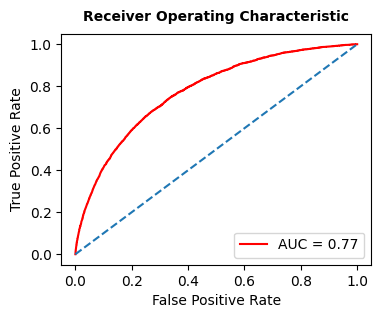

In [135]:
# Représentation graphique de la ROC_curve
ROC_curve('LightGBM_smote', lgb_smote, val, val_labels)

Observations :
La méthode SMOTE triple le nombre de FN par rapport à l'utilisation simple de class_weight = 'balanced' dans LightGBM. Nous allons donc finalement utiliser la méthode intégrée à LightGBM pour le rééquilibrage

### Creation d'une focntion custom  FN/FP avec seuil de probabilité

In [136]:
# Définition de la fonction custom afin de minimiser les FN et FP
# (avec un poids plus important de minimisation des FN (FN 10 fois plus coûteux))
def CustomScores(y_true, p_pred):
    fn_value = 10
    fp_value = 1
    y_pred = (p_pred >= threshold).astype(int)
    # Récupération des TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Définition des métriques à minimiser/maximiser
    score = fn*fn_value + fp*fp_value
    F1_score = f1_score(y_true, y_pred)
    return [('CustomScore', score, False), ('F1_score', F1_score, True)]

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.599772 seconds, init for row-wise cost 2.048080 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.294396 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.697
Precision score:   0.165
Recall score:      0.681
F1 score:          0.266
F2 score:          0.42
ROCAUC score:      0.752


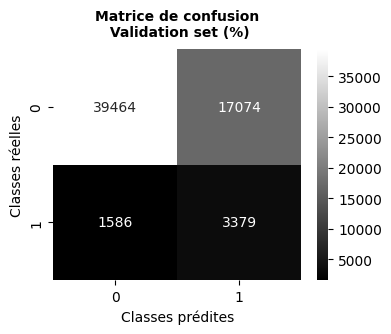

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.878089 seconds, init for row-wise cost 1.596315 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.741802 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.705
Precision score:   0.169
Recall score:      0.681
F1 score:          0.271
F2 score:          0.42
ROCAUC score:      0.757


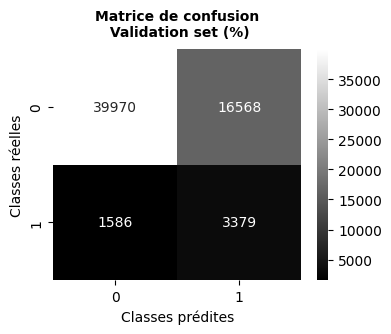

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.544715 seconds, init for row-wise cost 1.583101 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.734814 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.683
Precision score:   0.166
Recall score:      0.727
F1 score:          0.27
F2 score:          0.43
ROCAUC score:      0.767


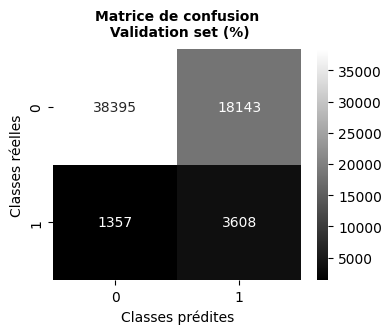

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.797111 seconds, init for row-wise cost 2.234460 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.488822 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.717
Precision score:   0.179
Recall score:      0.695
F1 score:          0.284
F2 score:          0.44
ROCAUC score:      0.772


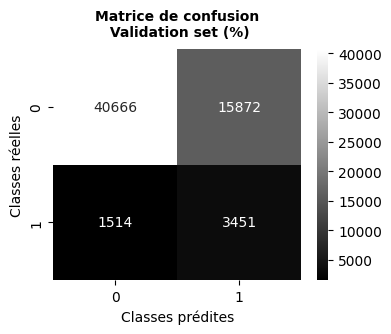

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.555736 seconds, init for row-wise cost 1.792054 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.994008 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.737
Precision score:   0.187
Recall score:      0.675
F1 score:          0.293
F2 score:          0.44
ROCAUC score:      0.779


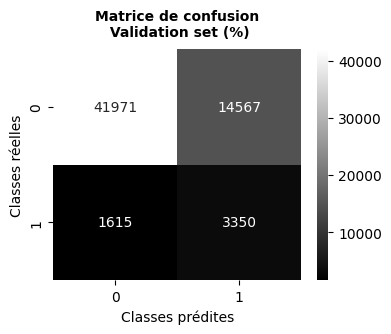

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.567366 seconds, init for row-wise cost 1.557512 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.706428 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.812
Precision score:   0.225
Recall score:      0.544
F1 score:          0.319
F2 score:          0.42
ROCAUC score:      0.778


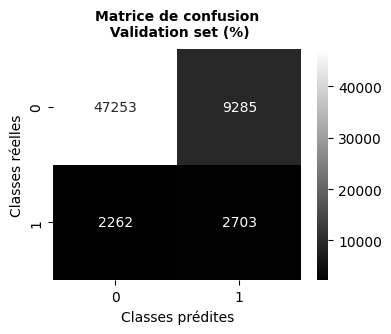

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.568763 seconds, init for row-wise cost 1.556363 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.705063 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.872
Precision score:   0.283
Recall score:      0.385
F1 score:          0.326
F2 score:          0.36
ROCAUC score:      0.778


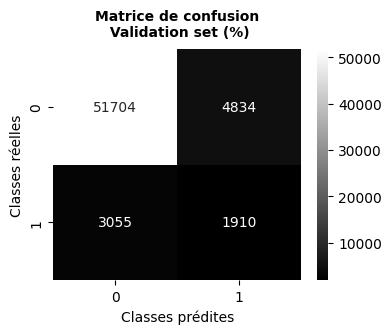

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.573897 seconds, init for row-wise cost 1.584987 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.737490 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.908
Precision score:   0.376
Recall score:      0.205
F1 score:          0.265
F2 score:          0.23
ROCAUC score:      0.779


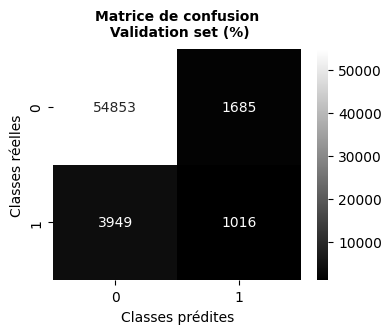

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.871463
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.609094
[LightGBM] [Debug] init for col-wise cost 0.892723 seconds, init for row-wise cost 2.278271 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.426953 seconds.
Y

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.92
Precision score:   0.538
Recall score:      0.0441
F1 score:          0.0815
F2 score:          0.054
ROCAUC score:      0.775


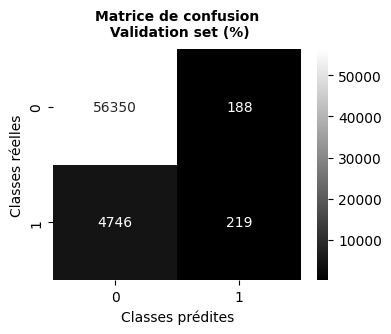

In [137]:
for i, threshold in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    # Création du modèle
    lgb_balanced = lgb.LGBMClassifier(objective = 'binary',
                                      boosting_type = 'goss',
                                      n_estimators = 10000,
                                          class_weight = 'balanced',
                                      early_stopping_rounds=200,
                                   verbose=100)
    # Calcul des différents scores et compilation des scores du modèle dans un dataframe
    df_results = scores(f'LightGBM_balanced_custom_threshold_0.{(i+1)}', lgb_balanced, train, val,
                        train_labels, val_labels, results,
                        fit_params = {
                                      'eval_set': [(train, train_labels), (val, val_labels)],
                                      'eval_metric': CustomScores},
                        threshold = threshold)

In [138]:
# Affichage des resultats et tri en fonction du coût
df_results.sort_values(by='cost')

classifier  TN_val  FP_val  FN_val  TP_val  \
19  LightGBM_balanced_custom_threshold_0.5   41971   14567    1615    3350   
4                        LightGBM_balanced   42400   14138    1677    3288   
18  LightGBM_balanced_custom_threshold_0.4   40666   15872    1514    3451   
17  LightGBM_balanced_custom_threshold_0.3   38395   18143    1357    3608   
10             LightGBM_under_0.2_balanced   42174   14364    1738    3227   
20  LightGBM_balanced_custom_threshold_0.6   47253    9285    2262    2703   
11             LightGBM_under_0.4_balanced   40839   15699    1629    3336   
12             LightGBM_under_0.6_balanced   40486   16052    1601    3364   
9                       LightGBM_under_0.8   43331   13207    1911    3054   
5                       LightGBM_under_maj   39218   17320    1501    3464   
16  LightGBM_balanced_custom_threshold_0.2   39970   16568    1586    3379   
13             LightGBM_under_0.8_balanced   39713   16825    1561    3404   
15  LightGBM_balanced_custom_threshold_0.1   39464   17074    1586    3379   
8                       LightGBM_under_0.6   47099    9439    2395    2570   
21  LightGBM_balanced_custom_threshold_0.7   51704    4834    3055    1910   
7                       LightGBM_under_0.4   51259    5279    3123    1842   
22  LightGBM_balanced_custom_threshold_0.8   54853    1685    3949    1016   
6                       LightGBM_under_0.2   55374    1164    4275     690   
23  LightGBM_balanced_custom_threshold_0.9   56350     188    4746     219   
3                                 LightGBM   56333     205    4746     219   
14                          LightGBM_smote   56380     158    4794     171   
2                      Logistic regression   56521      17    4961       4   
1                      Logistic regression   56521      17    4961       4   
0                                    Dummy   52069    4469    4549     416   

     cost  train_accuracy  val_accuracy  train_precision  val_precision  \
19  30717        0.753195      0.736891         0.215606       0.186973   
4   30908        0.762016      0.742858         0.224129       0.188684   
18  31012        0.762821      0.717315         0.249283       0.178595   
17  31713        0.737752      0.682942         0.234982       0.165877   
10  31744        0.759626      0.738192         0.386428       0.183446   
20  31905        0.824494      0.812253         0.259530       0.225475   
11  31989        0.745591      0.718258         0.539985       0.175256   
12  32062        0.736688      0.712973         0.627396       0.173259   
9   32317        0.736377      0.754191         0.720813       0.187811   
5   32330        0.739225      0.693982         0.737788       0.166667   
16  32428        0.788820      0.704827         0.276555       0.169399   
13  32435        0.744187      0.701055         0.697280       0.168273   
15  32934        0.804193      0.696600         0.291930       0.165208   
8   33389        0.750264      0.807587         0.707546       0.214006   
21  35384        0.883422      0.871730         0.337701       0.283215   
7   36509        0.782808      0.863389         0.699205       0.258672   
22  41175        0.915799      0.908395         0.460696       0.376157   
6   43914        0.848204      0.911565         0.681856       0.372168   
23  47648        0.924080      0.919776         0.797685       0.538084   
3   47665        0.923007      0.919500         0.771091       0.516509   
14  48098        0.957289      0.919484         0.998208       0.519757   
2   49627        0.919108      0.919061         0.243590       0.190476   
1   49627        0.919108      0.919061         0.243590       0.190476   
0   49959        0.851570      0.853373         0.081427       0.085159   

    train_recall  val_recall  train_F1_score  val_F1_score  train_F2_score  \
19      0.779809    0.674723        0.337812      0.292807        0.511899   
4       0.791289    0.662236        0.349315     

Observations :
La fonction custom permet la détermination du seuil de prédition optimal = le seuil est optimal pour 0,5, c'est à dire le seuil standard utilisé par la méthode predict_proba.
La fonction permet également d'optimiser le coût : un compromis entre FP et FN semble être trouvé.

### Suppression des colinearites

In [139]:
# Chargement du dataset pour modélisation
train_corrs_removed = pd.read_csv(path +'train_corrs_removed.csv')

# Suppression de la target
train_corrs_rem_target = train_corrs_removed['TARGET']
train_corrs_rem = train_corrs_removed.drop(columns = ['SK_ID_CURR', 'TARGET','DAYS_EMPLOYED_ANOM'])

In [ ]:
# Imputation des valeurs manquantes par la médiane
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train_corrs_rem)
train_corrs_rem = imputer.transform(train_corrs_rem)

In [ ]:
# Splitting du jeu train en train+val
train_corr, val_corr, train_corr_labels, val_corr_labels = train_test_split(train_corrs_rem,
                                                                            train_corrs_rem_target,
                                                                            test_size = 0.2,
                                                                            stratify = train_corrs_rem_target,
                                                                            random_state = 56)# Splitting du jeu train en train+val


In [142]:
print('Training shape: ', train_corr.shape)
print('Validation shape: ', val_corr.shape)

Training shape:  (246008, 623)
Validation shape:  (61503, 623)


In [ ]:
# Création du modèle
lgb_balanced = lgb.LGBMClassifier(objective = 'binary',
                                  boosting_type = 'goss',
                                  n_estimators = 10000,
                                  class_weight = 'balanced',
                                  verbose=100,
                                  early_stopping_rounds=200)

# Calcul des différents scores et compilation des scores du modèle dans un dataframe
threshold = 0.5
scores('LightGBM_corrs_removed', lgb_balanced, train_corr, val_corr,
        train_corr_labels, val_corr_labels, results,
        fit_params = {
                      'eval_set': [(train_corr, train_corr_labels),
                                   (val_corr, val_corr_labels)],
                      'eval_metric': CustomScores},
      threshold = threshold)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


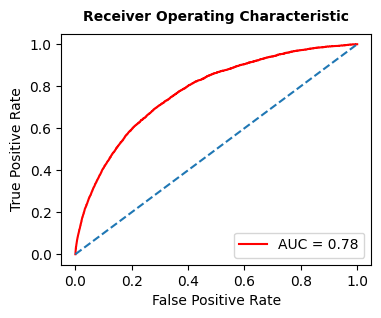

In [144]:
# Représentation graphique de la ROC_curve
ROC_curve('LightGBM_corrs_removed', lgb_balanced, val_corr, val_corr_labels)

Observations :
L'entrainement de ce modèle sur les données sans colinéarité donne des performances similaires en termes de nombres de FN, FP, autres métriques et de temps d'apprentissage/prédiction.

In [ ]:
# Nouvelle détermination du seuil optimal suite à la suppression de presque moitié des variables
for i, threshold in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    # Création du modèle
    lgb_balanced = lgb.LGBMClassifier(objective = 'binary',
                                      boosting_type = 'goss',
                                      n_estimators = 10000,
                                      class_weight = 'balanced',
                                      verbose=100,
                                  early_stopping_rounds=200)
    # Calcul des différents scores et compilation des scores du modèle dans un dataframe
    df_results = scores(f'LightGBM_balanced_custom_cors_rem_threshold_0.{(i+1)}', lgb_balanced, train_corr, val_corr,
        train_corr_labels, val_corr_labels, results,
        fit_params = {
                      'eval_set': [(train_corr, train_corr_labels),
                                   (val_corr, val_corr_labels)],
                                      'eval_metric': CustomScores},
                        threshold = threshold)

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.906776
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.708382
[LightGBM] [Debug] init for col-wise cost 0.247829 seconds, init for row-wise cost 0.416959 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.282734 seconds.
Y

In [ ]:
# Affichage des résulats
df_results

In [ ]:
# Enregistrement des resultats dans un fichier .csv
df_results.to_csv(path +'models_results.csv', index = False)


Observations :
Le seuil de prédiction optimal est encore une fois 0,5.

### Ajout du feature engineering

#### Features polynomiales¶

In [ ]:
# Chargement du dataset pour modélisation
train_corrs_removed_poly = pd.read_csv(path +'train_corrs_removed_poly.csv')

# Suppression de la target
app_train_poly_target = train_corrs_removed_poly['TARGET']
app_train_poly = train_corrs_removed_poly.drop(columns = ['SK_ID_CURR', 'TARGET','DAYS_EMPLOYED_ANOM'])

In [ ]:
# Imputation des valeurs manquantes par la médiane
imputer = SimpleImputer(strategy = 'median')
imputer.fit(app_train_poly)
app_train_poly = imputer.transform(app_train_poly)

In [ ]:
# Splitting du jeu train en train+val
train_poly, val_poly, train_poly_labels, val_poly_labels = train_test_split(app_train_poly,
                                                                            app_train_poly_target,
                                                                            test_size = 0.2,
                                                                            stratify = app_train_poly_target,
                                                                            random_state = 56)

In [ ]:
print('Training shape: ', train_poly.shape)
print('Validation shape: ', val_poly.shape)

In [ ]:
# Création du modèle
lgb_balanced = lgb.LGBMClassifier(objective = 'binary',
                                  boosting_type = 'goss',
                                  n_estimators = 10000,
                                  class_weight = 'balanced',
                                  verbose=100,
                                  early_stopping_rounds=200)

# Calcul des différents scores et compilation des scores du modèle dans un dataframe
scores('LightGBM_corrs_rem_poly', lgb_balanced, train_poly, val_poly,
        train_poly_labels, val_poly_labels, results,
        fit_params = {
                      'eval_set': [(train_poly, train_poly_labels),
                                   (val_poly, val_poly_labels)],
                      'eval_metric': CustomScores},
        threshold = 0.5)

In [ ]:
# Représentation graphique de la ROC_curve
ROC_curve('LightGBM_corrs_rem_poly', lgb_balanced, val_poly, val_poly_labels)

Observations :
L'entrainement de ce modèle sur les données sans colinéarité avec les features polynomiales laisse apparaitre un sur-apprentissage plus important. Les temps d'apprentissage et de prédiction sont plus longs.

#### Features metiers

In [ ]:
# Chargement du dataset pour modélisation
train_corrs_rem_domain = pd.read_csv(path +'train_corrs_removed_domain.csv')

# Suppression de la target
app_train_domain_target = train_corrs_rem_domain['TARGET']
app_train_domain = train_corrs_rem_domain.drop(columns = ['SK_ID_CURR', 'TARGET','DAYS_EMPLOYED_ANOM'])
features_domain = app_train_domain.columns

In [ ]:
# Imputation des valeurs manquantes par la médiane
imputer = SimpleImputer(strategy = 'median')
imputer.fit(app_train_domain)
app_train_domain = imputer.transform(app_train_domain)

In [ ]:
# Splitting du jeu train en train+val
train_domain, val_domain, \
              train_domain_labels, \
              val_domain_labels = train_test_split(app_train_domain,
                                                   app_train_domain_target,
                                                   test_size = 0.2,
                                                   stratify = app_train_domain_target,
                                                   random_state = 56)

In [ ]:
print('Training shape: ', train_domain.shape)
print('Validation shape: ', val_domain.shape)

In [ ]:
# Création du modèle
lgb_balanced = lgb.LGBMClassifier(objective = 'binary',
                                  boosting_type = 'goss',
                                  n_estimators = 10000,
                                  class_weight = 'balanced',
                                  verbose=100,
                                  early_stopping_rounds=200
                                  )

# Calcul des différents scores et compilation des scores du modèle dans un dataframe
df_results = scores('LightGBM_corrs_rem_domain', lgb_balanced, train_domain, val_domain,
                    train_domain_labels, val_domain_labels, results,
                    fit_params = {
                                  'eval_set': [(train_domain, train_domain_labels),
                                               (val_domain, val_domain_labels)],
                                  'eval_metric': CustomScores},
                    threshold = 0.5)

In [ ]:
# Représentation graphique de la ROC_curve
ROC_curve('LightGBM_corrs_rem_domain', lgb_balanced, val_domain, val_domain_labels)

Observations :
L'entrainement de ce modèle sur les données sans colinéarité avec les features métier donne une nouvelle fois des performances similaires en termes de nombres de FN, FP et légerement supérieures pour les autres métriques, bien qu'un surapprentissage plus important apparaisse.


#### Optimisation avec valeur croisée

In [ ]:
# Tri des resultats afin de mener l'optimisation des paramètres sur le meilleur feature engineering
df_results.sort_values(by='cost').head(10)

Observations :
Comme conclu précédemment, le modèle LightGBM "LightGBM_corrs_rem_domain" (sur les données dont les corrélations fortes ont été supprimées, et les features métier ajoutées) possède un léger surapprentissage.
Essayons d'améliorer les performances et limiter le sur-apprentissage à l'aide d'une optimisation des paramètres avec validation croisée.

In [ ]:
# Définition des scores pour la recherche sur grille

# Définition de la fonction custom afin de minimiser les FN et FP
# (avec un poids plus important de minimisation des FN (FN 10 fois plus coûteux))
def CustomScore(y_true, p_pred):
    fn_value = 10
    fp_value = 1
    y_pred = (p_pred >= 0.5).astype(int) # threshold = 0.5
    # Récupération des TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Définition de la métrique à minimiser
    score = fn*fn_value + fp*fp_value
    return score

custom_score = make_scorer(CustomScore, greater_is_better = False, needs_proba = True)


# Définition du F1_score que l'on veut maximiser
def F1_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

F1_score = make_scorer(F1_score, greater_is_better = True)

In [ ]:
# Enregistrement des resultats dans un fichier .csv
#df_results.to_csv(path +'models_results.csv', index = False)

In [ ]:
#load df Results
df_results=pd.read_csv(path+'models_results.csv')

In [ ]:
df_results.head(10)

classifier  TN_val  FP_val  FN_val  TP_val   cost  train_accuracy  \
0                Dummy   51948    4590    4582     383  50410        0.851074   
1  Logistic regression   56521      17    4961       4  49627        0.919108   
2  Logistic regression   56521      17    4961       4  49627        0.919108   
3             LightGBM   56333     205    4746     219  47665        0.923007   
4    LightGBM_balanced   42400   14138    1677    3288  30908        0.762016   
5   LightGBM_under_maj   39474   17064    1528    3437  32344        0.738016   
6   LightGBM_under_0.2   55372    1166    4254     711  43706        0.847692   
7   LightGBM_under_0.4   51482    5056    3171    1794  36766        0.781168   
8   LightGBM_under_0.6   47125    9413    2349    2616  32903        0.751284   
9   LightGBM_under_0.8   43162   13376    1877    3088  32146        0.741949   

   val_accuracy  train_precision  val_precision  train_recall  val_recall  \
0      0.850869         0.078149       0.077016      0.078248    0.077140   
1      0.919061         0.243590       0.190476      0.000957    0.000806   
2      0.919061         0.243590       0.190476      0.000957    0.000806   
3      0.919500         0.771091       0.516509      0.065811    0.044109   
4      0.742858         0.224129       0.188684      0.791289    0.662236   
5      0.697706         0.737896       0.167650      0.738268    0.692246   
6      0.911874         0.681212       0.378796      0.161934    0.143202   
7      0.866234         0.695550       0.261898      0.416314    0.361329   
8      0.808757         0.710420       0.217474      0.568479    0.526888   
9      0.751996         0.725755       0.187561      0.674119    0.621954   

   train_F1_score  val_F1_score  train_F2_score  val_F2_score  train_roc_auc  \
0        0.078199      0.077078        0.078228      0.077115       0.498595   
1        0.001906      0.001604        0.001195      0.001006       0.598829   
2        0.001906      0.001604        0.001195      0.001006       0.598829   
3        0.121271      0.081277        0.080545      0.053983       0.837044   
4        0.349315      0.293689        0.525388      0.440916       0.857101   
5        0.738082      0.269929        0.738194      0.425782       0.818621   
6        0.261666      0.207834        0.191062      0.163546       0.807133   
7        0.520868      0.303682        0.452659      0.335829       0.815221   
8        0.631573      0.307873        0.592141      0.410173       0.815117   
9        0.698985      0.288208        0.683850      0.425063       0.818324   

   val_roc_auc  train_time  predict_time  
0     0.497978    0.008553      0.002327  
1     0.593705   23.092394      0.079185  
2     0.593705   22.397838      0.082441  
3     0.772729   87.192441      0.304827  
4     0.778999  104.522314      0.415640  
5     0.759820   36.691292      0.178670  
6     0.760955   57.154329      0.172327  
7     0.762943   46.335513      0.206644  
8     0.763384   40.472322      0.182365  
9     0.763889   38.866986      0.191981

In [ ]:
# Définition du modèle
lgb_balanced_opt = lgb.LGBMClassifier(objective = 'binary',
                                      boosting_type = 'goss',
                                      n_estimators = 5000,
                                      class_weight = 'balanced',

                                      n_jobs = -1)

# Grille de paramètres
lgbm_param_grid = {'num_leaves': np.linspace(10, 40, 4, dtype = 'int'),
                   'min_child_samples': stats.randint(100, 250),
                   'min_child_weight': [1e-5, 1e-2, 1],
                   'subsample': stats.uniform(loc = 0.2, scale = 0.8),
                   'colsample_bytree': stats.uniform(loc = 0.4, scale = 0.6),
                   'reg_alpha': [0.1, 1],
                   'reg_lambda': [0.1, 1]}

# Définition de la recherche sur grille
grid_cv_lgbm = RandomizedSearchCV(lgb_balanced_opt,
                                  lgbm_param_grid,
                                  n_iter = 2, cv = 3,
                                  scoring = {'custom_score': custom_score,
                                             'F1_score': F1_score},
                                  refit = 'custom_score',
                                  n_jobs = -1,
                                  return_train_score = True,
                                  verbose = True,

                                  random_state = 56)



In [ ]:
# Exécution de la recherche sur grille sur le jeu d'entrainement
start = time.time()
lgb_balanced_opt = grid_cv_lgbm.fit(train_domain, train_domain_labels)
end = time.time()

# Affichage des paramètres optimaux
print("Optimization time: {} seconds".format(end-start))
print("The optimal parameters are {} with a score of {:.2f}"\
      .format(grid_cv_lgbm.best_params_,
              grid_cv_lgbm.best_score_))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.354430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48670
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 571
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.50000

[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.900051
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.688040
[LightGBM] [Debug] init for col-wise cost 0.325511 seconds, init for row-wise cost 1.046997 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.069199 seconds.
Y

2023/09/19 19:19:34 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmprr5lijax/model/model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.2.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Results on validation set:
Accuracy score:    0.744
Precision score:   0.192
Recall score:      0.676
F1 score:          0.299
F2 score:          0.45
ROCAUC score:      0.782


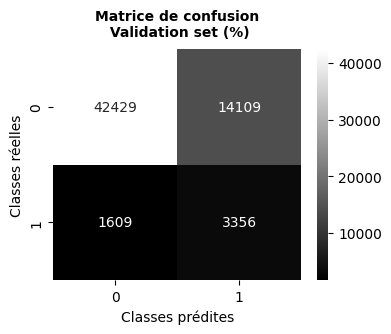

In [ ]:
# Lancement de l'algorithme avec les paramètres optimisés sur tout le jeu de données
lgb_balanced_opt_domain = lgb.LGBMClassifier(objective = 'binary',
                                      boosting_type = 'goss',
                                      n_estimators = 10000,
                                      class_weight = 'balanced',
                                      n_jobs = -1,
                                             verbose=100,
                                             early_stopping_rounds=200,
                                      **grid_cv_lgbm.best_params_)
threshold = 0.5
df_results = scores('lgb_balanced_opt_domain', lgb_balanced_opt_domain, train_domain, val_domain,
                     train_domain_labels, val_domain_labels, results,
                     fit_params = {
                                  'eval_set': [(train_domain, train_domain_labels),
                                               (val_domain, val_domain_labels)],
                                  'eval_metric': CustomScores}
                    )

In [ ]:
df_results.sort_values(by='cost').head(10)

classifier  TN_val  FP_val  FN_val  TP_val   cost  \
0  lgb_balanced_opt_domain   42429   14109    1609    3356  30199   

   train_accuracy  val_accuracy  train_precision  val_precision  train_recall  \
0        0.758345      0.744435         0.219605       0.192156      0.780614   

   val_recall  train_F1_score  val_F1_score  train_F2_score  val_F2_score  \
0    0.675932        0.342778      0.299242        0.516646      0.449565   

   train_roc_auc  val_roc_auc  train_time  predict_time  
0       0.848824     0.782228  552.663493      0.396867

Observations :
Le modèle optimisé perd légèrement en performances en termes de coût, mais, contrairement à toutes les autres simulations, les performances train et val sont équivalentes sur toutes les métriques.
L'optimisation des paramètres avec validation croisée a donc permis de limiter le surapprentissage.

In [ ]:
# Enregistrement des resultats dans un fichier .csv
df_results.to_csv(path +'models_results.csv', index = False)

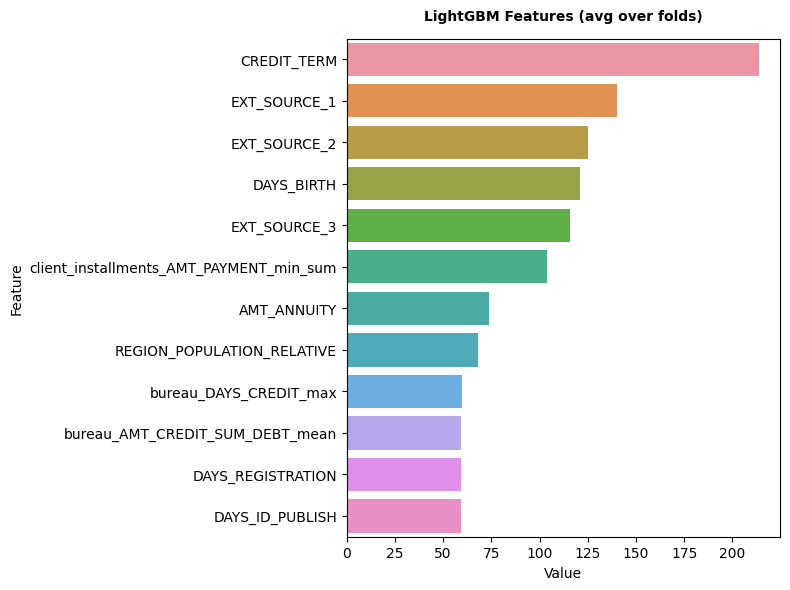

In [ ]:
# Visualisation de l'importance des features
feature_imp = pd.DataFrame(sorted(zip(lgb_balanced_opt_domain.feature_importances_, features_domain)),
                           columns = ['Value', 'Feature'])

plt.figure(figsize = (8, 6))
sns.barplot(x = "Value", y = "Feature",
            data = feature_imp.sort_values(by = "Value",
                                           ascending = False).head(12))
plt.title('LightGBM Features (avg over folds)',
          fontsize = 10, y = 1.02, fontweight = 'bold')
plt.tight_layout()
plt.savefig(path+'lgbm-opt_importances.png',
            bbox_inches = "tight", transparent = True)

Observations :
Ce graphique montre que les features ayant le plus d'impact dans le modèle optimisé sont la durée du crédit, les features inconnues EXT_SOURCE_ 1,2 et 3, le montant des mensualités et l'âge du client.


#Enregistrement des données pour dashboard




In [ ]:
# Echantillonage des données pour limiter la taille du fichier
app_train_sampled = train_corrs_rem_domain.sample(n=20000)
app_train_sampled.to_csv(path +'app_train_sampled.csv', index = False)

# Analyse du Drift

In [ ]:
# Récupération des features les plus importantes du modèle
feature_imp_sort = feature_imp.sort_values(by = "Value",
                                           ascending = False)
features_datadrift = feature_imp_sort['Feature'].head(80).tolist()

In [ ]:
# Définition des données références et des nouvelles données
reference = train_corrs_rem_domain.loc[:, features_datadrift]
current = test_corrs_removed_domain.loc[:, features_datadrift]

In [ ]:
# Génération du rapport datadrift
report = Report(metrics=[DataDriftPreset()])
report.run(reference_data=reference, current_data=current)
report.save_html(path +'data_drift_report.html')

Observations :
En examinant le fichier html dans le navigateur, il semble que parmi les 80 variables les plus décisives du modèle, seulement 16,3 % ont drifté sur les nouvelles données. La conclusion du rapport est que sur l'ensemble des données, le datadrift n'est pas detecté (seuil à 50%).